# AIT Development notebook

## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|1|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit|
| 4|import|1|you should write use import modules.<br>but bottom lines do not edit.|should edit|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

In [ ]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
Processing ./ait_sdk-0.1.4-py3-none-any.whl
Processing /root/.cache/pip/wheels/fa/ad/67/90bbaacdcfe970960dd5158397f23a6579b51d853720d7856d/psutil-5.7.3-cp36-cp36m-linux_x86_64.whl
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached nbformat-5.0.8-py3-none-any.whl (172 kB)
  Using cached numpy-1.19.3-cp36-cp36m-manylinux2010_x86_64.whl (14.9 MB)
Processing /root/.cache/pip/wheels/46/6d/cc/73a126dc2e09fe56fcec0a7386d255762611fbed1c86d3bbcc/py_cpuinfo-7.0.0-py3-none-any.whl
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl (11 kB)
  Using cached Jinja2-2.11.2-py2.py3-none-any.whl (125 kB)
  Using cached jupyterlab_pygments-0.1.2-py2.py3-none-any.whl (4.6 kB)
  Using cached bleach-3.2.1-py2.py3-none-any.whl (145 kB)
  Using cached nbclient-0.5.1-py3-none-any.whl (65 kB)
  Using cached defusedxml-0.6.0-py2.py3-none-any.whl (23 k

In [3]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()
    requirements_generator.add_package('pandas')
    requirements_generator.add_package('seaborn')
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

In [4]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
import itertools
from os import makedirs, path

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [5]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_find_ca_high_risk')
    manifest_genenerator.set_ait_description('Evaluating quantity of high risk CA combination cases in BDD dataset)')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/データセットの被覆性')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories('Data', 'dataset', 'Classification of different attributes related to autonomous driving scenarios', ['csv'], 'https://bdd-data.berkeley.edu/')
    manifest_genenerator.add_ait_inventories('High_risk_CA_combinations', 'attribute set', 'Combinations of different attribute values that are high risk situations in real life', ['csv'], 'User given data')
    manifest_genenerator.add_ait_measures('SingleCount', 'int', 'Number of high risk cases in simple combinations', 'single')
    manifest_genenerator.add_ait_measures('CombinedCount', 'int', 'Number of high risk cases in combine combinations', 'single')
    manifest_genenerator.add_ait_resources('CountResult', '/usr/local/qai/resources/1/highrisk_ca_totalcount.csv', 'table', 'Count of number of data in each high risk case')
    manifest_genenerator.add_ait_resources('CombinedCountResult', '/usr/local/qai/resources/2/Combined_result_data/', 'table', 'Count of number of data in various high risk case combinations')
    manifest_genenerator.add_ait_resources('DistributionPlot', '/usr/local/qai/resources/3/Combined_result_plots/', 'picture', 'Plot of percentage of various high risk cases in data')
    manifest_genenerator.add_ait_downloads('Log', '/usr/local/qai/downloads/1/ait.log', 'AITLog')
    manifest_path = manifest_genenerator.write()

In [6]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories('Data','data/BDD_labels_2036.csv')
    input_generator.add_ait_inventories('High_risk_CA_combinations','HighRisk_CA_combinations/HighRisk_CA_combination_cases.csv')
    input_generator.write()

In [7]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [8]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'SingleCount')
def calc_single_count(highrisk_datacount):
    return int(highrisk_datacount['Count'].sum())

In [9]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'CombinedCount')
def calc_combine_count(count):
    return int(count)

In [10]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@resources(ait_output, path_helper, 'CountResult')
def simple_count(data, highrisk_data, file_path: str=None) -> None:
    makedirs(str(Path(file_path).parent), exist_ok=True)
    
    highrisk_data_out = highrisk_data.copy()
    
    for index, row in highrisk_data_out.iterrows():
        temp_dict = dict(row)
        att_list = [key for key,val in temp_dict.items() if val != 'Any']
        att_values = [highrisk_data_out.loc[index,col] for col in att_list]
        count = count_data(data,att_list,att_values)
        highrisk_data_out.loc[index,'Count'] = count
    highrisk_data_out.to_csv(file_path,index=False) 
    return highrisk_data_out

def count_data(data,att_list,att_values):
    grouped = data.groupby(att_list)
    try: 
        dt =grouped.get_group(tuple(att_values))
        count = len(dt)
    except: 
        count = 0
    return count

BOLD = '\033[1m'
END = '\033[0m'

In [11]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
def combinationwise_count(data,highrisk_data,file_path: str=None) -> int:
    total_count = 0
    
    for index, row in highrisk_data.iterrows():
        temp_dict = dict(row)
        att_list = [key for key,val in temp_dict.items() if val != 'Any']
        att_values = [highrisk_data.loc[index,col] for col in att_list]
        for i in range(2, len(att_list)):
            r = i
            att_comb = list(itertools.combinations(att_list,r)) #Create possible combination of attributes

            ###Updating domain_dict with attribute and attribute values
            ###domain_dict will be a dictionary with attributes as keys and attribute values as values
            domain_dict = {}
            domain_dict.fromkeys(att_list)
            for j,att in enumerate(att_list):
                domain_dict[att] = att_values[j]

            ### Updating comb_dict with combinations of attributes
            ### comb_dict is a dictionary with attribute combinations as keys, and list of list of attribute values of each attribute as value
            comb_dict = {}
            comb_dict.fromkeys(att_comb)

            for m, comb in enumerate(att_comb):
                value_list = [domain_dict[list(comb)[t]] for t in range(len(comb))]
                comb_dict[comb] = value_list


            result_df = pd.DataFrame(columns = ['Attribute combination','Value combination','Count', 'Ratio'])

            for ind,comb in enumerate(att_comb):

                grouped = data.groupby(list(comb))
                try: 
                    dt = grouped.get_group(tuple(comb_dict[comb]))
                    count = len(dt)
                except: 
                    count = 0

                #file_name = (' + '.join(list(att_comb[ind])))
                file_name = 'Highriskcases_for_'+'row_' + str(index+1) + 'ca_' +str(len(comb))
                result_df.loc[ind,'Attribute combination'] = ('+'.join(comb))
                result_df.loc[ind,'Value combination'] = ('+'.join(comb_dict[comb]))
                result_df.loc[ind,'Count'] = count           #Log quanity of data per value combination
                result_df.loc[ind,'Ratio'] = round(count/len(data),4)

            save_combinationwise_count(result_df, file_name)
            plot_result(result_df,file_name)
            print(BOLD+'\nResult of analysis for row number:'+END, index+1)
            print(BOLD+'\nNumber of attribute to combine:'+END, r)
            print(BOLD+'\nResult of analysis for row number:\n'+END, result_df)
            print('\n        ************************************       \n')
            
            total_count += result_df['Count'].sum()
    return total_count

@log(logger)
@resources(ait_output, path_helper, 'CombinedCountResult')
def save_combinationwise_count(result_df, file_name, file_path: str=None) -> None:
    makedirs(str(Path(file_path)), exist_ok=True)
    file_path = file_path+file_name+'.csv'
    result_df.to_csv(file_path,index = False )

    return file_path

@log(logger)
@resources(ait_output, path_helper, 'DistributionPlot')
def plot_result(result_df,f_name, file_path: str=None) -> None:
    makedirs(str(Path(file_path)), exist_ok=True)
    if len(result_df)<30: font_size = 10
    if len(result_df)>30: font_size = 5
    result_df.plot(x = 'Value combination', y = 'Ratio', kind = 'bar', fontsize = font_size,figsize = (10,6))
    plt.yscale('log')
    plt.xlabel('High risk cases')
    plt.ylabel('Distribution of data in combination')
    for index,_data in enumerate(list(result_df['Ratio'].values)): 
        if _data>1:_data=1
        if _data<0.001: continue
        plt.annotate( str(_data),(index , _data*1.1), va = 'bottom' ,ha = 'center', fontsize = font_size,rotation = 90)
    fig_path = file_path +  f_name +'.jpg'
    plt.savefig(fig_path,bbox_inches='tight')
    
    return fig_path

In [12]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log')
def move_log(file_path: str=None) -> None:
    makedirs(str(Path(file_path).parent), exist_ok=True)
    shutil.move(get_log_path(), file_path)

In [13]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:

    # インベントリを読み込み
    data = pd.read_csv(ait_input.get_inventory_path('Data'))
    highrisk_data = pd.read_csv(ait_input.get_inventory_path('High_risk_CA_combinations'))

    highrisk_datacount = simple_count(data,highrisk_data)
    combine_count = combinationwise_count(data,highrisk_data)
    
    calc_single_count(highrisk_datacount)
    calc_combine_count(combine_count)
    
    move_log()


Result of analysis for row number: 1

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination Value combination Count   Ratio
0     Road type+Weather     Highway+Snowy     0       0
1  Road type+Pedestrian   Highway+On road     2   0.001
2        Road type+Time     Highway+Night    75  0.0368
3    Weather+Pedestrian     Snowy+On road     0       0
4          Weather+Time       Snowy+Night     2   0.001
5       Pedestrian+Time     On road+Night    22  0.0108

        ************************************       



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 1

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination      Value combination Count Ratio
0  Road type+Weather+Pedestrian  Highway+Snowy+On road     0     0
1        Road type+Weather+Time    Highway+Snowy+Night     0     0
2     Road type+Pedestrian+Time  Highway+On road+Night     0     0
3       Weather+Pedestrian+Time    Snowy+On road+Night     0     0

        ************************************       


Result of analysis for row number: 2

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination Value combination Count   Ratio
0     Road type+Weather     Highway+Foggy     0       0
1  Road type+Pedestrian   Highway+On road     2   0.001
2        Road type+Time     Highway+Night    75  0.0368
3    Weather+Pedestrian     Foggy+On road     1  0.0005
4          Weather+Time       Foggy+Night     0       0
5       Pedestrian+Time     On road+Night    22  0.0108

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 2

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination      Value combination Count Ratio
0  Road type+Weather+Pedestrian  Highway+Foggy+On road     0     0
1        Road type+Weather+Time    Highway+Foggy+Night     0     0
2     Road type+Pedestrian+Time  Highway+On road+Night     0     0
3       Weather+Pedestrian+Time    Foggy+On road+Night     0     0

        ************************************       


Result of analysis for row number: 3

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination Value combination Count   Ratio
0     Road type+Weather     Highway+Rainy     5  0.0025
1  Road type+Pedestrian   Highway+On road     2   0.001
2        Road type+Time     Highway+Night    75  0.0368
3    Weather+Pedestrian     Rainy+On road     1  0.0005
4          Weather+Time       Rainy+Night    24  0.0118
5       Pedestrian+Time     On road+Night    22  0.0108

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 4

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination          Value combination Count Ratio
0  Road type+Weather+Pedestrian  Highway+Snowy+On sidewalk     0     0
1        Road type+Weather+Time        Highway+Snowy+Night     0     0
2     Road type+Pedestrian+Time  Highway+On sidewalk+Night     0     0
3       Weather+Pedestrian+Time    Snowy+On sidewalk+Night     0     0

        ************************************       


Result of analysis for row number: 5

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination    Value combination Count   Ratio
0     Road type+Weather        Highway+Foggy     0       0
1  Road type+Pedestrian  Highway+On sidewalk     1  0.0005
2        Road type+Time        Highway+Night    75  0.0368
3    Weather+Pedestrian    Foggy+On sidewalk     0       0
4          Weather+Time          Foggy+Night     0       0
5       Pedestria

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 5

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination          Value combination Count Ratio
0  Road type+Weather+Pedestrian  Highway+Foggy+On sidewalk     0     0
1        Road type+Weather+Time        Highway+Foggy+Night     0     0
2     Road type+Pedestrian+Time  Highway+On sidewalk+Night     0     0
3       Weather+Pedestrian+Time    Foggy+On sidewalk+Night     0     0

        ************************************       


Result of analysis for row number: 6

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination    Value combination Count   Ratio
0     Road type+Weather        Highway+Rainy     5  0.0025
1  Road type+Pedestrian  Highway+On sidewalk     1  0.0005
2        Road type+Time        Highway+Night    75  0.0368
3    Weather+Pedestrian    Rainy+On sidewalk    12  0.0059
4          Weather+Time          Rainy+Night    24  0.0118
5       Pedestria

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 10

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination          Value combination Count Ratio
0  Road type+Weather+Pedestrian      Highway+Snowy+On road     0     0
1        Road type+Weather+Time    Highway+Snowy+Dawn/Dusk     0     0
2     Road type+Pedestrian+Time  Highway+On road+Dawn/Dusk     0     0
3       Weather+Pedestrian+Time    Snowy+On road+Dawn/Dusk     0     0

        ************************************       


Result of analysis for row number: 11

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination  Value combination Count   Ratio
0     Road type+Weather      Highway+Foggy     0       0
1  Road type+Pedestrian    Highway+On road     2   0.001
2        Road type+Time  Highway+Dawn/Dusk    17  0.0083
3    Weather+Pedestrian      Foggy+On road     1  0.0005
4          Weather+Time    Foggy+Dawn/Dusk     0       0
5       Pedestrian+Time  On

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 11

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination          Value combination Count Ratio
0  Road type+Weather+Pedestrian      Highway+Foggy+On road     0     0
1        Road type+Weather+Time    Highway+Foggy+Dawn/Dusk     0     0
2     Road type+Pedestrian+Time  Highway+On road+Dawn/Dusk     0     0
3       Weather+Pedestrian+Time    Foggy+On road+Dawn/Dusk     0     0

        ************************************       


Result of analysis for row number: 12

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination  Value combination Count   Ratio
0     Road type+Weather      Highway+Rainy     5  0.0025
1  Road type+Pedestrian    Highway+On road     2   0.001
2        Road type+Time  Highway+Dawn/Dusk    17  0.0083
3    Weather+Pedestrian      Rainy+On road     1  0.0005
4          Weather+Time    Rainy+Dawn/Dusk     2   0.001
5       Pedestrian+Time  On

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 12

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination          Value combination Count Ratio
0  Road type+Weather+Pedestrian      Highway+Rainy+On road     0     0
1        Road type+Weather+Time    Highway+Rainy+Dawn/Dusk     0     0
2     Road type+Pedestrian+Time  Highway+On road+Dawn/Dusk     0     0
3       Weather+Pedestrian+Time    Rainy+On road+Dawn/Dusk     0     0

        ************************************       


Result of analysis for row number: 13

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination      Value combination Count   Ratio
0     Road type+Weather          Highway+Snowy     0       0
1  Road type+Pedestrian    Highway+On sidewalk     1  0.0005
2        Road type+Time      Highway+Dawn/Dusk    17  0.0083
3    Weather+Pedestrian      Snowy+On sidewalk     0       0
4          Weather+Time        Snowy+Dawn/Dusk     1  0.0005
5  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 13

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination              Value combination Count Ratio
0  Road type+Weather+Pedestrian      Highway+Snowy+On sidewalk     0     0
1        Road type+Weather+Time        Highway+Snowy+Dawn/Dusk     0     0
2     Road type+Pedestrian+Time  Highway+On sidewalk+Dawn/Dusk     0     0
3       Weather+Pedestrian+Time    Snowy+On sidewalk+Dawn/Dusk     0     0

        ************************************       


Result of analysis for row number: 14

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination      Value combination Count   Ratio
0     Road type+Weather          Highway+Foggy     0       0
1  Road type+Pedestrian    Highway+On sidewalk     1  0.0005
2        Road type+Time      Highway+Dawn/Dusk    17  0.0083
3    Weather+Pedestrian      Foggy+On sidewalk     0       0
4          Weather+Time        Foggy+Dawn/Du

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 14

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination              Value combination Count Ratio
0  Road type+Weather+Pedestrian      Highway+Foggy+On sidewalk     0     0
1        Road type+Weather+Time        Highway+Foggy+Dawn/Dusk     0     0
2     Road type+Pedestrian+Time  Highway+On sidewalk+Dawn/Dusk     0     0
3       Weather+Pedestrian+Time    Foggy+On sidewalk+Dawn/Dusk     0     0

        ************************************       


Result of analysis for row number: 15

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination      Value combination Count   Ratio
0     Road type+Weather          Highway+rainy     0       0
1  Road type+Pedestrian    Highway+On sidewalk     1  0.0005
2        Road type+Time      Highway+Dawn/Dusk    17  0.0083
3    Weather+Pedestrian      rainy+On sidewalk     0       0
4          Weather+Time        rainy+Dawn/Du

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 15

Number of attribute to combine: 3

Result of analysis for row number:
           Attribute combination              Value combination Count Ratio
0  Road type+Weather+Pedestrian      Highway+rainy+On sidewalk     0     0
1        Road type+Weather+Time        Highway+rainy+Dawn/Dusk     0     0
2     Road type+Pedestrian+Time  Highway+On sidewalk+Dawn/Dusk     0     0
3       Weather+Pedestrian+Time    rainy+On sidewalk+Dawn/Dusk     0     0

        ************************************       


Result of analysis for row number: 16

Number of attribute to combine: 2

Result of analysis for row number:
   Attribute combination  Value combination Count   Ratio
0     Road type+Weather      Highway+Snowy     0       0
1        Road type+Time  Highway+Dawn/Dusk    17  0.0083
2          Weather+Time    Snowy+Dawn/Dusk     1  0.0005

        ************************************       


Result of analysis for row number: 17

Number of attribute to comb

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.



Result of analysis for row number: 50

Number of attribute to combine: 3

Result of analysis for row number:
               Attribute combination        Value combination Count Ratio
0  Road type+Obstacle+Image clarity  Tunnel+Others+Not clear     0     0
1           Road type+Obstacle+Time      Tunnel+Others+Night     0     0
2      Road type+Image clarity+Time   Tunnel+Not clear+Night     0     0
3       Obstacle+Image clarity+Time   Others+Not clear+Night     0     0

        ************************************       


Result of analysis for row number: 51

Number of attribute to combine: 2

Result of analysis for row number:
      Attribute combination   Value combination Count   Ratio
0       Road type+Obstacle     Tunnel+Not sure     0       0
1  Road type+Image clarity    Tunnel+Not clear     0       0
2           Road type+Time        Tunnel+Night     1  0.0005
3   Obstacle+Image clarity  Not sure+Not clear     2   0.001
4            Obstacle+Time      Not sure+Night     2  

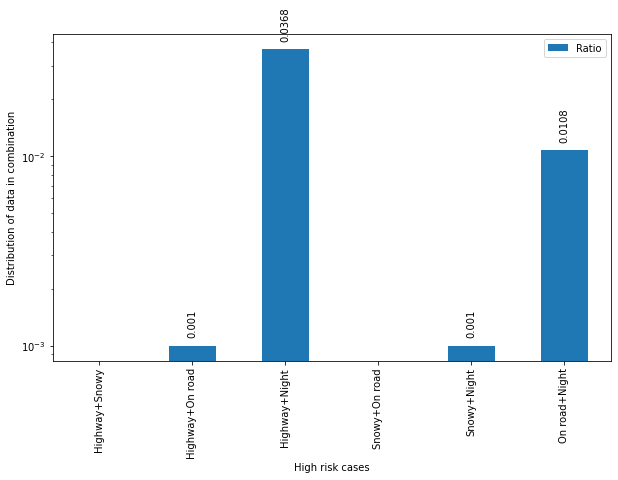

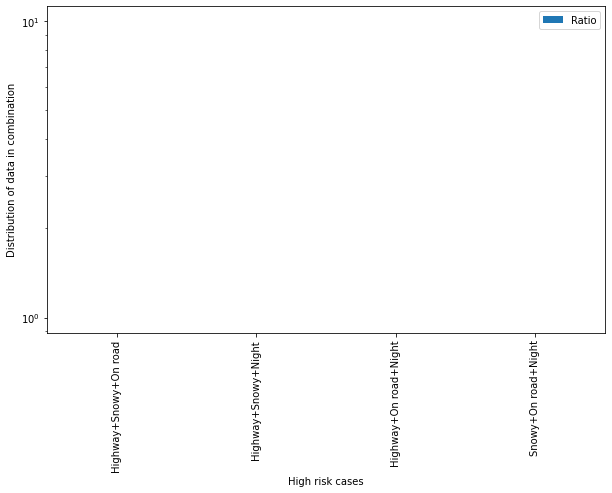

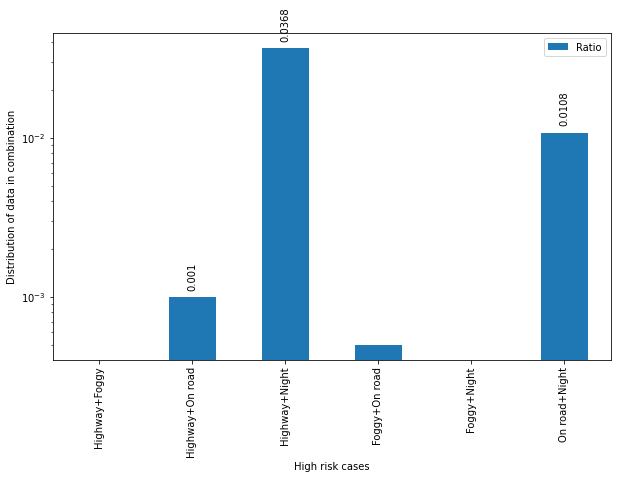

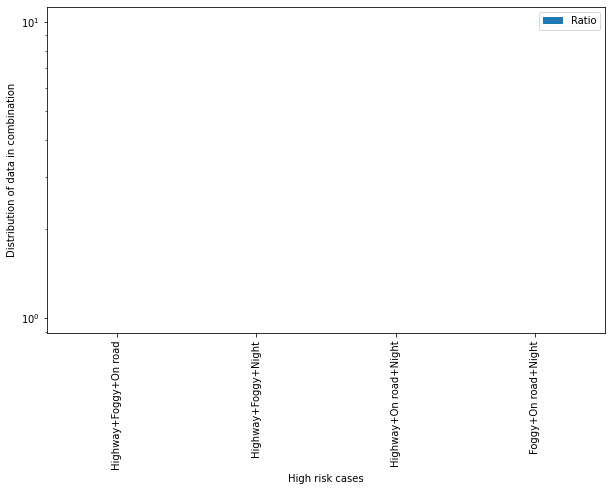

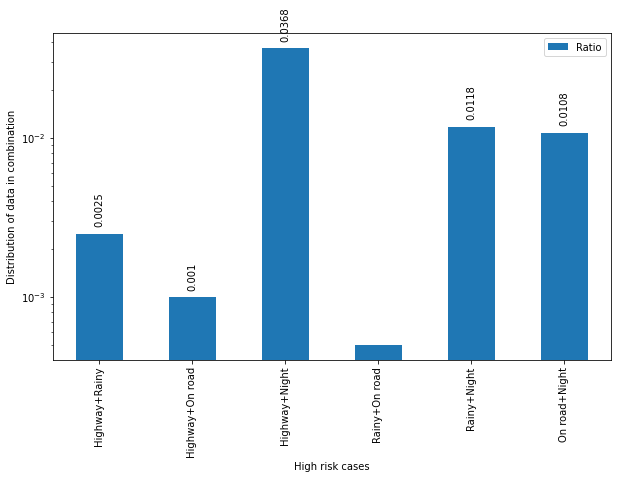

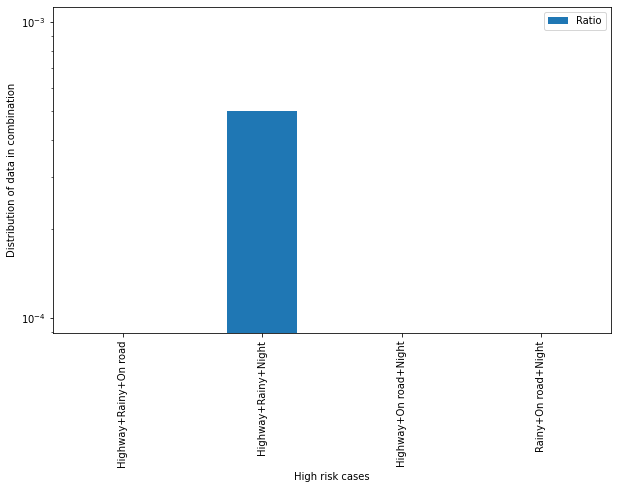

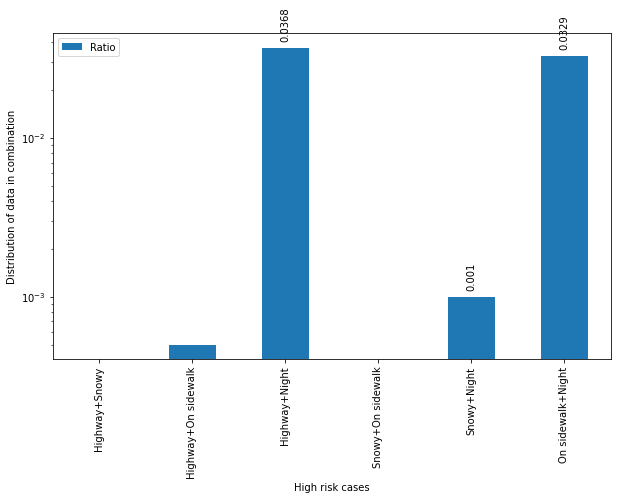

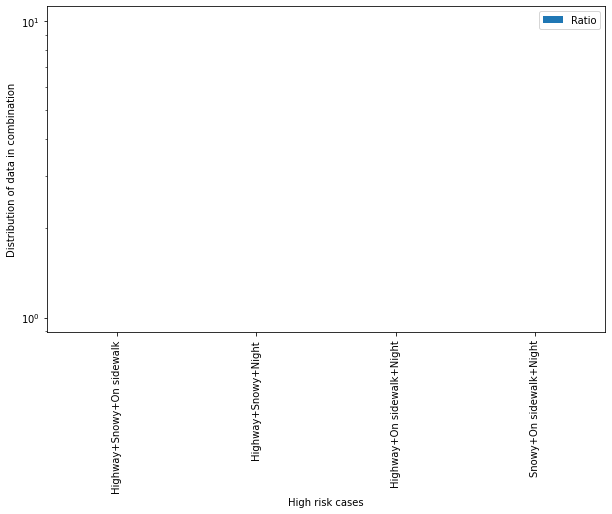

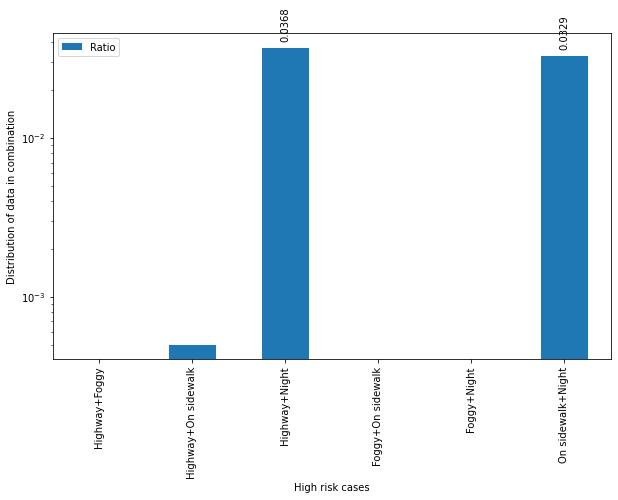

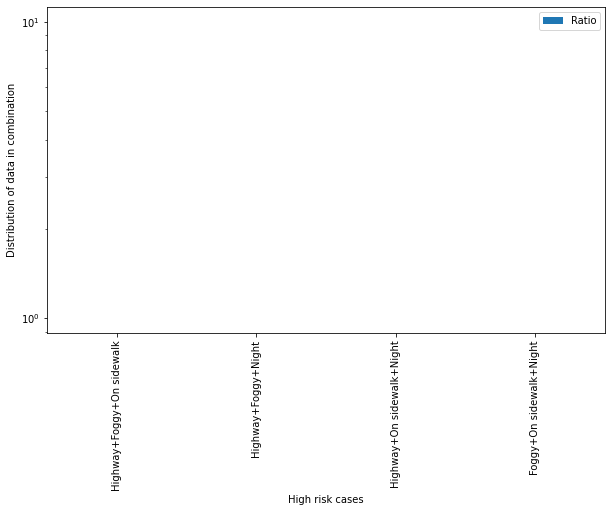

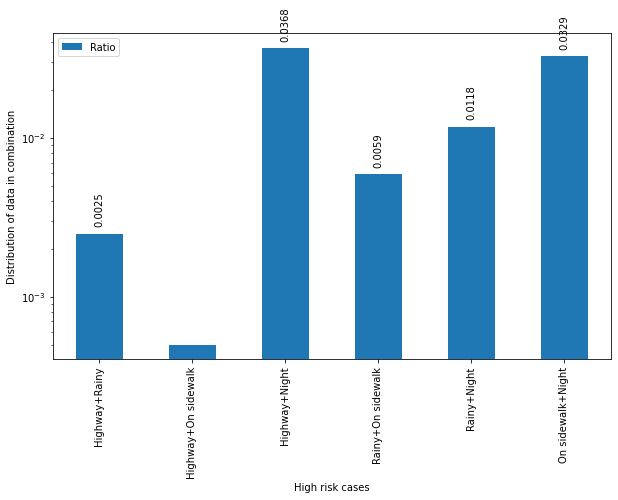

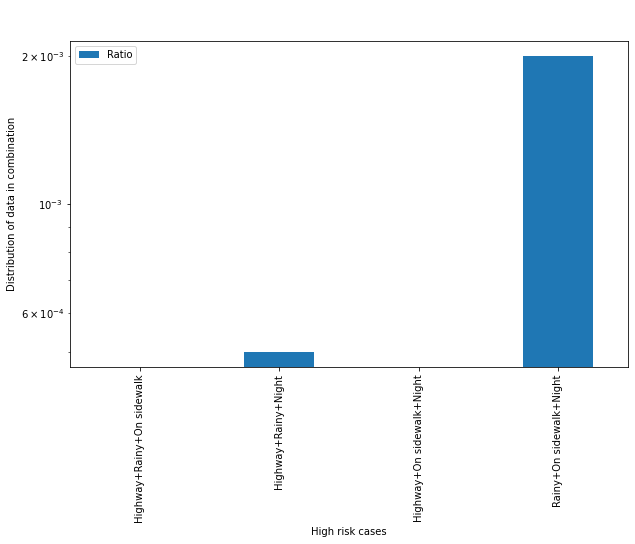

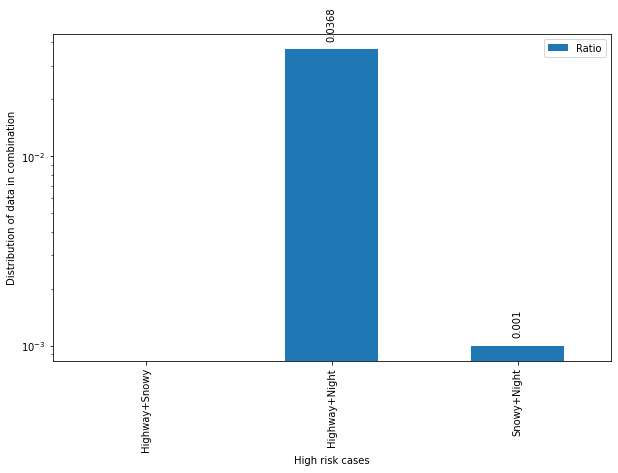

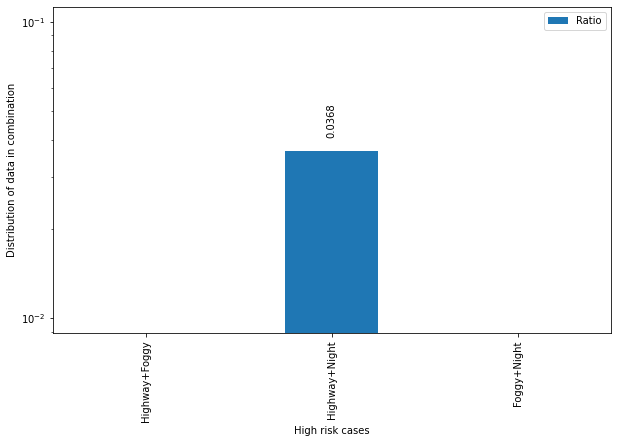

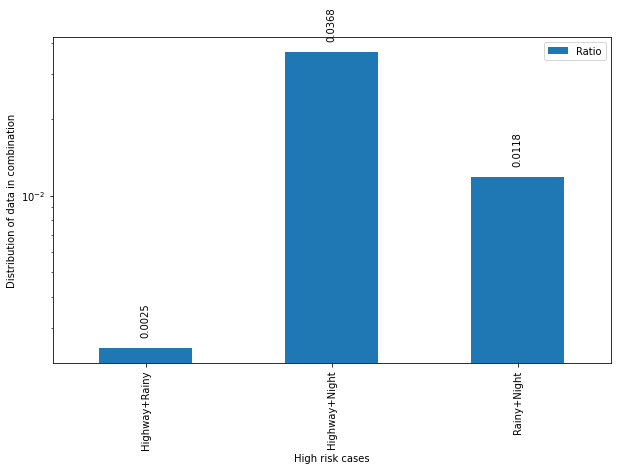

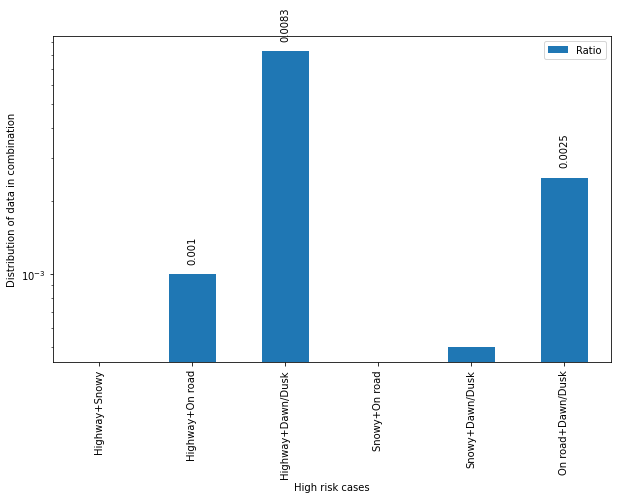

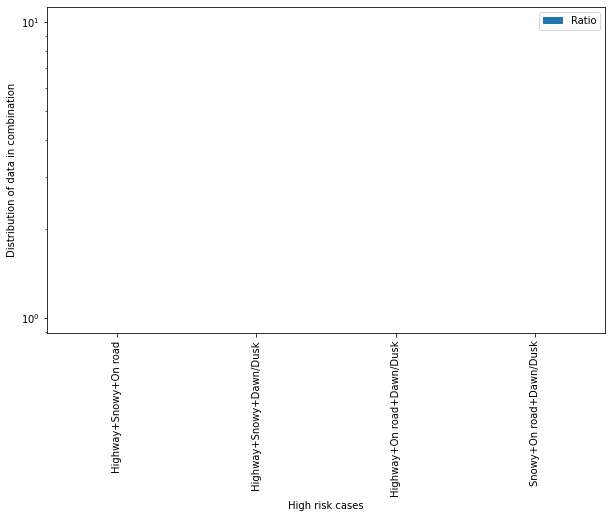

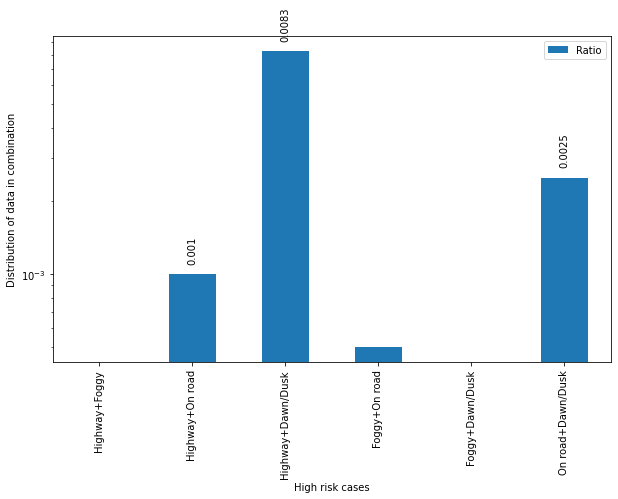

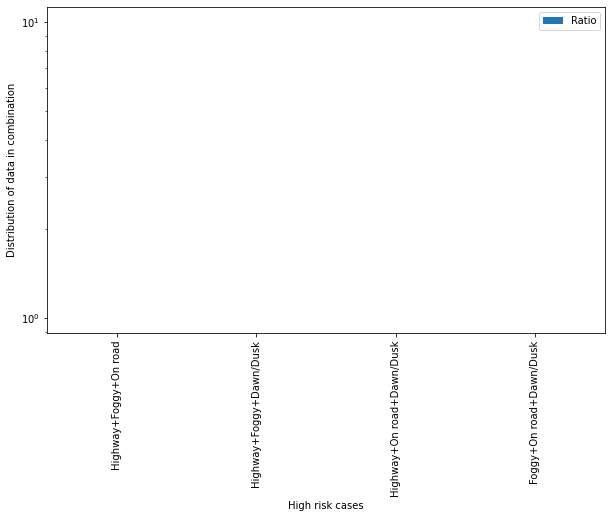

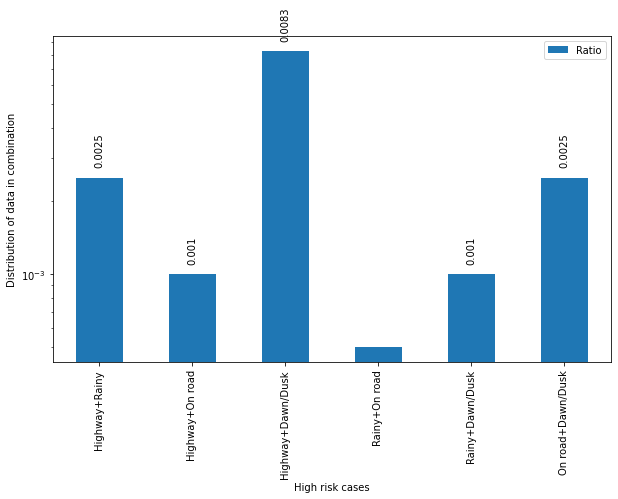

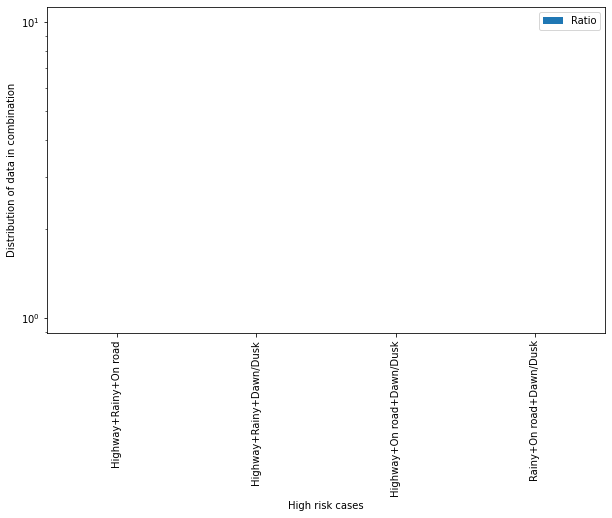

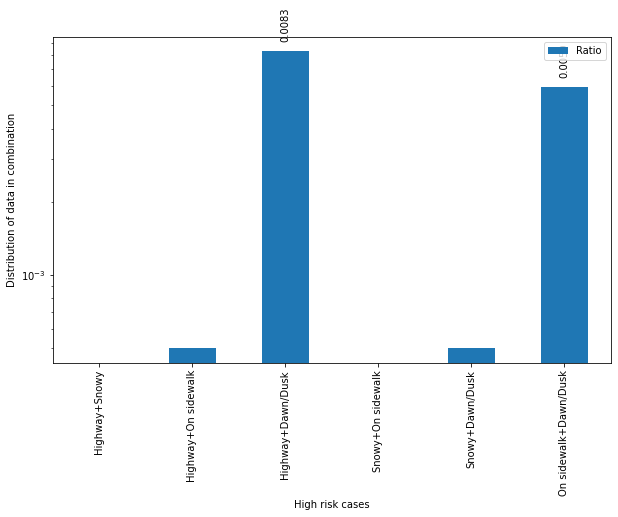

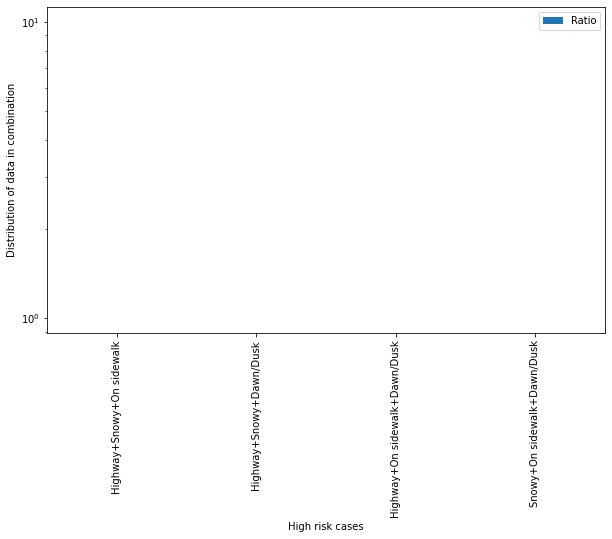

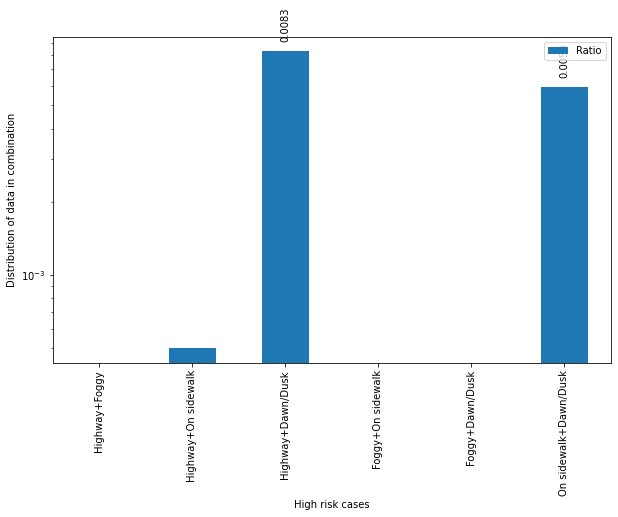

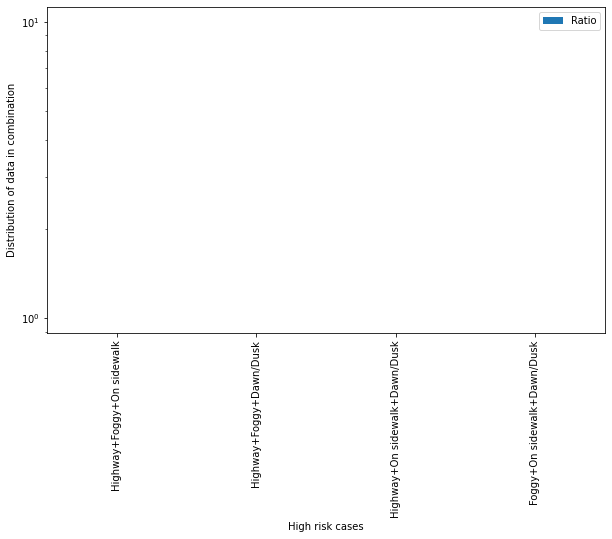

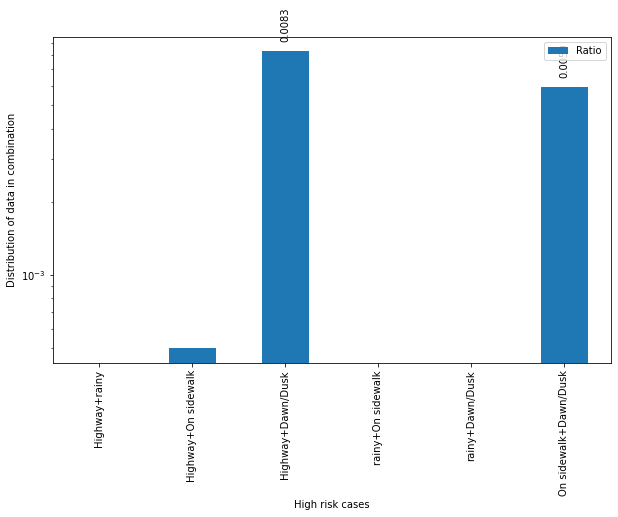

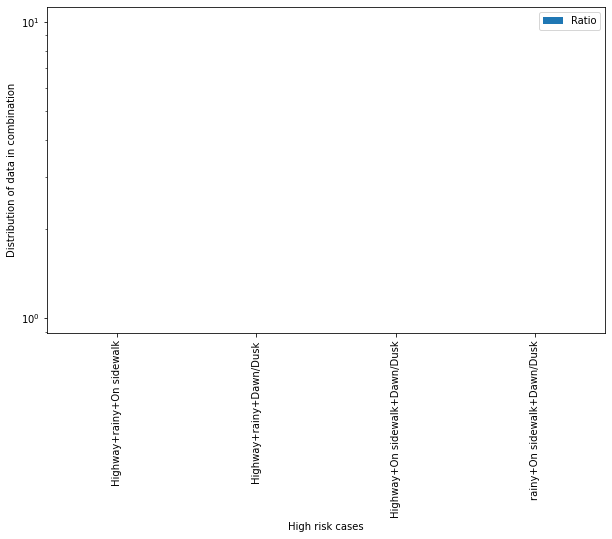

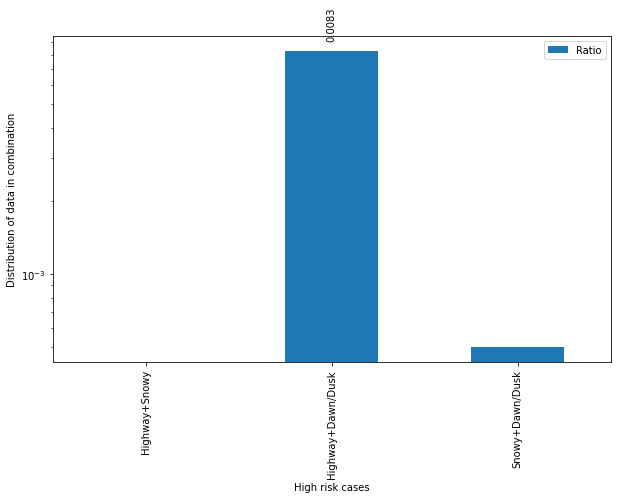

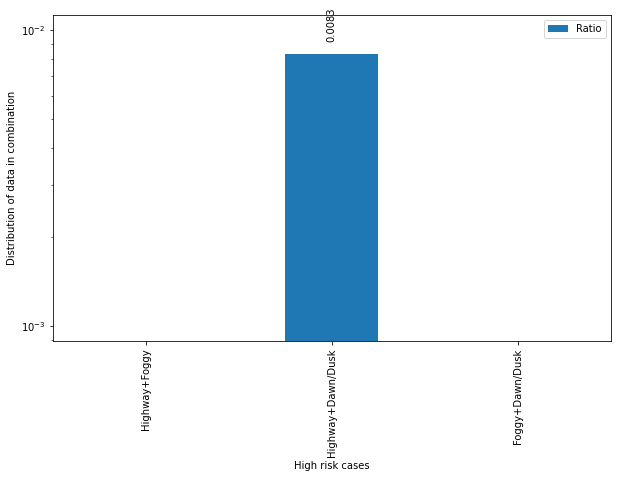

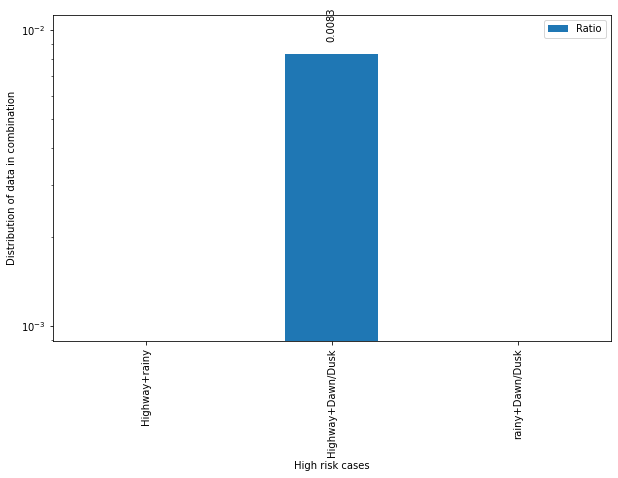

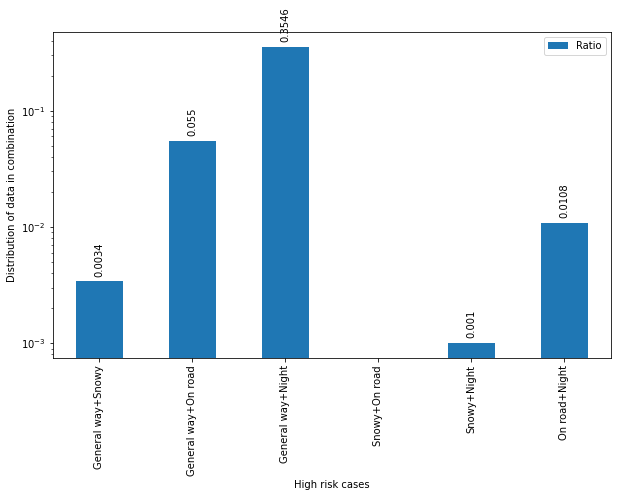

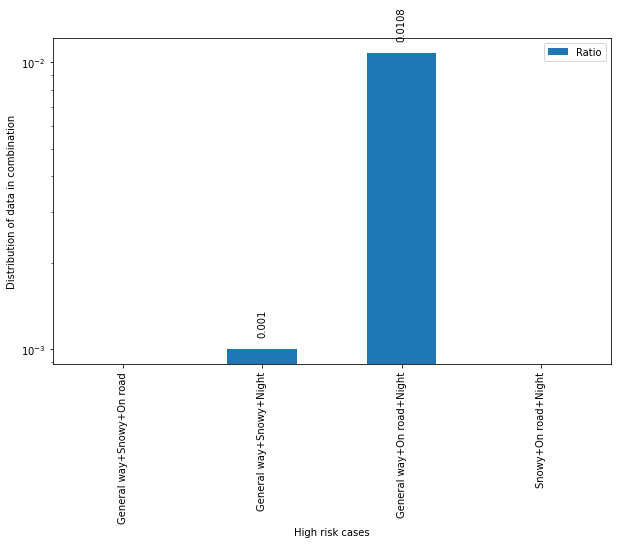

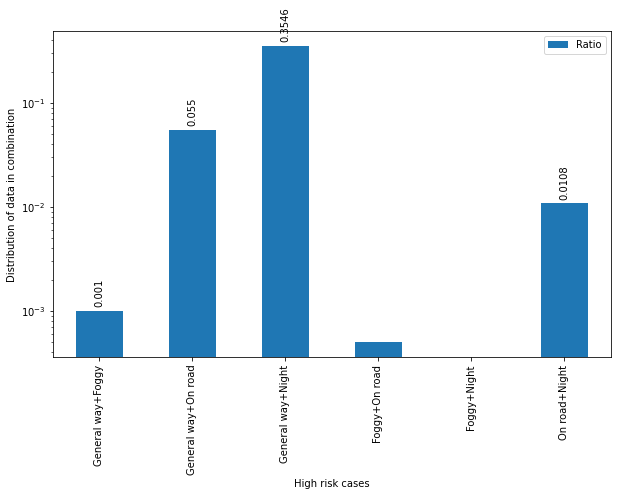

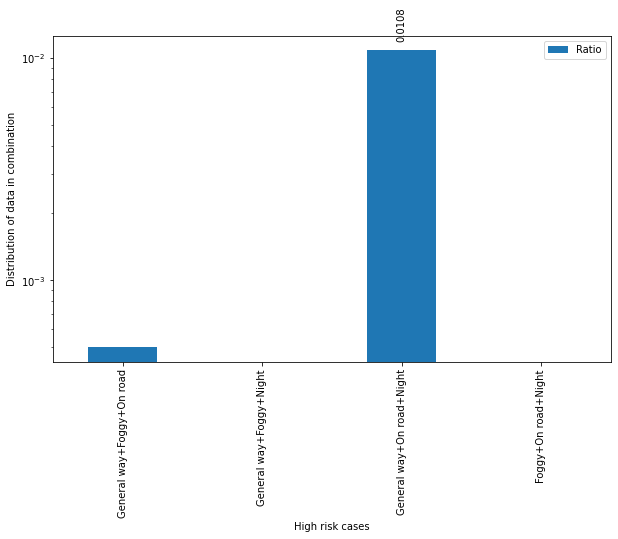

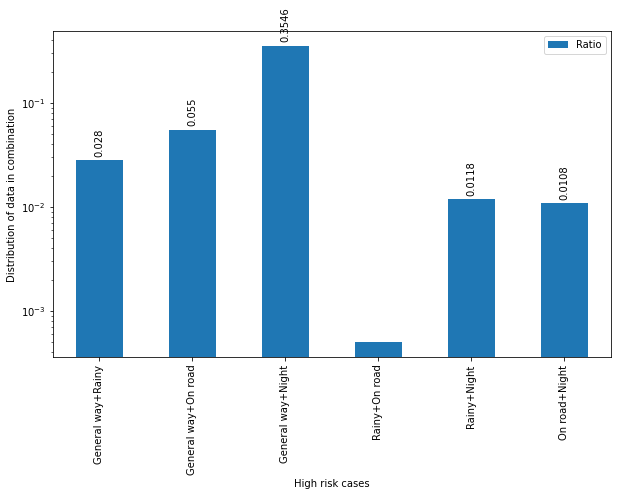

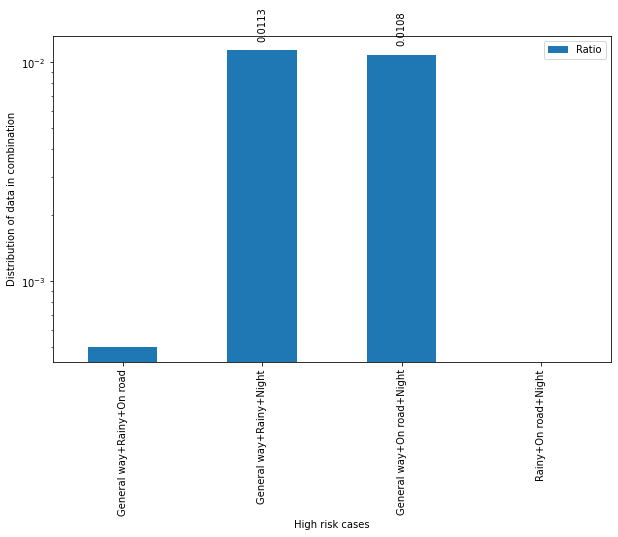

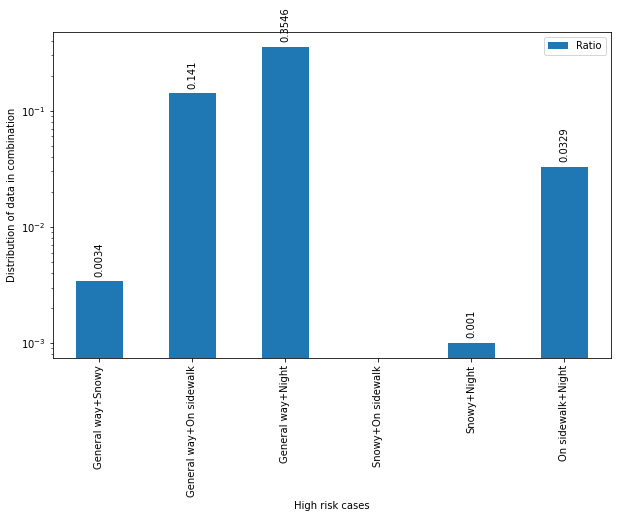

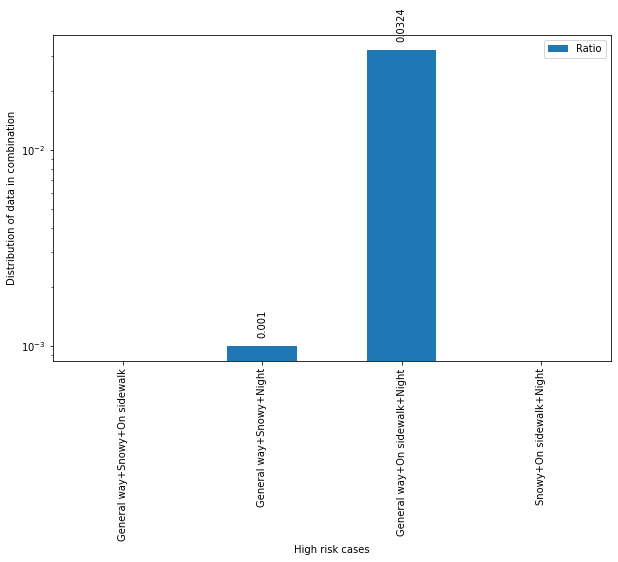

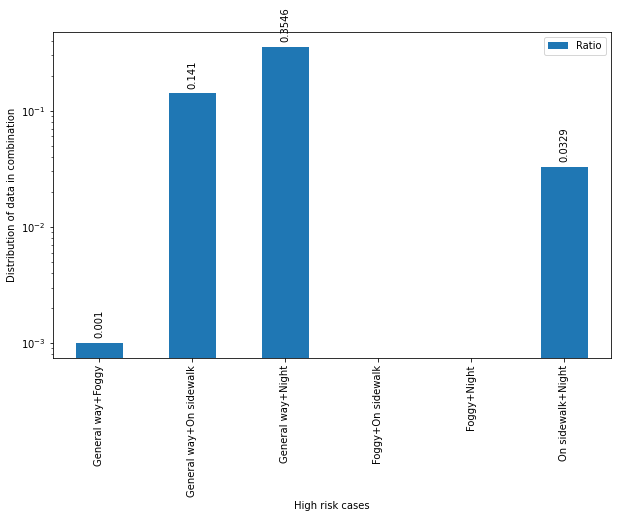

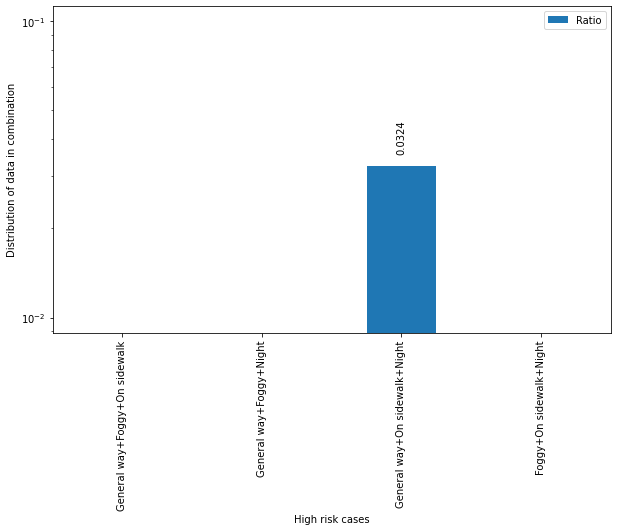

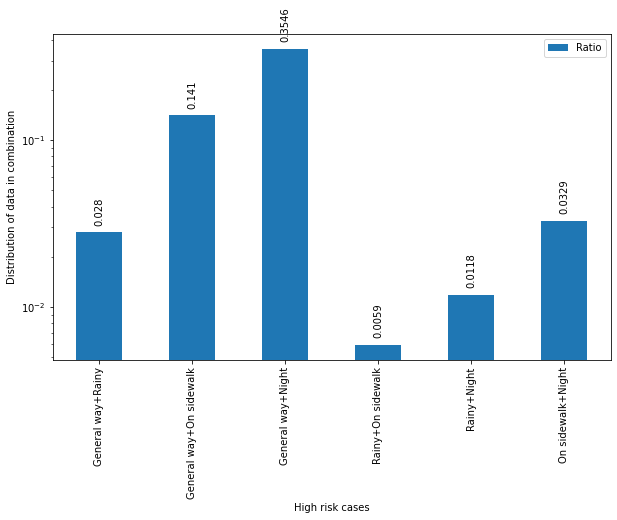

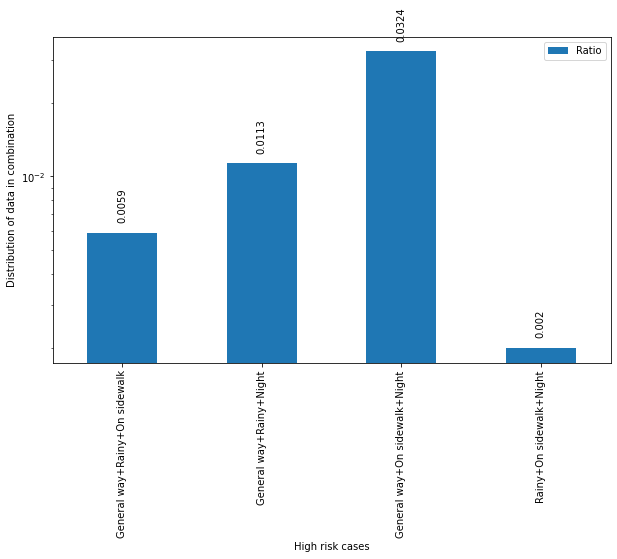

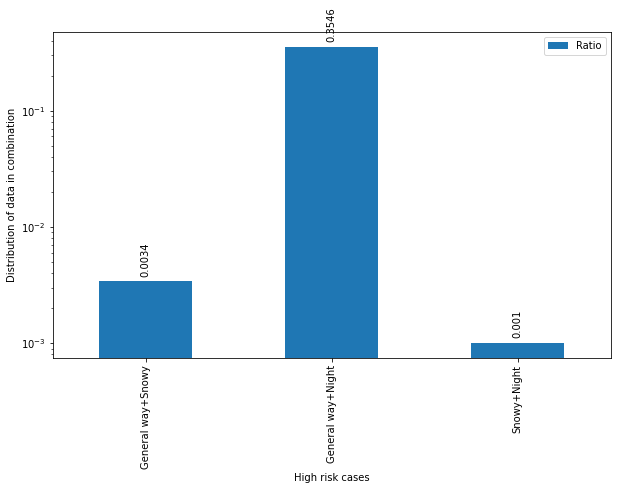

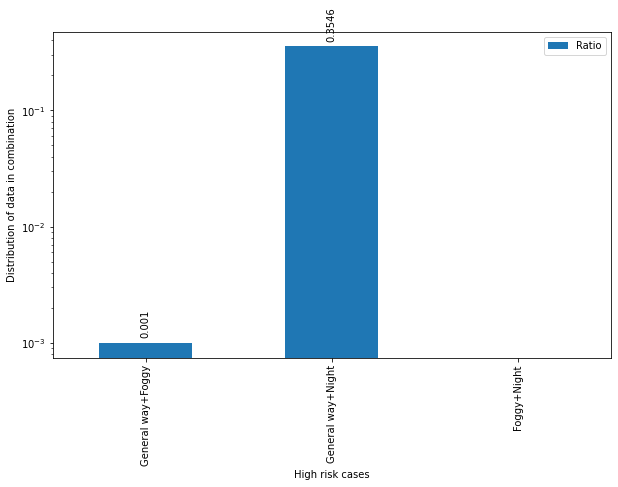

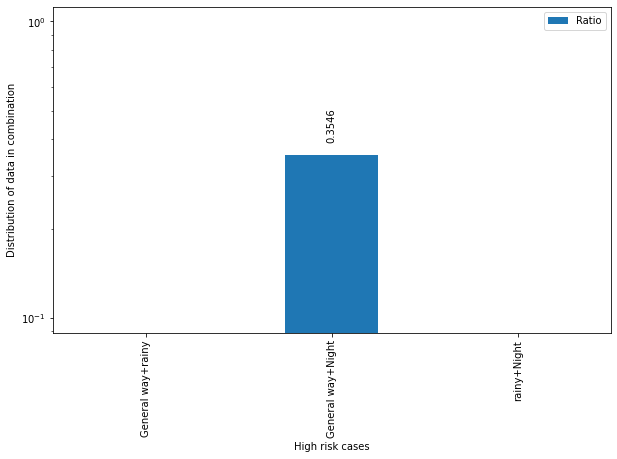

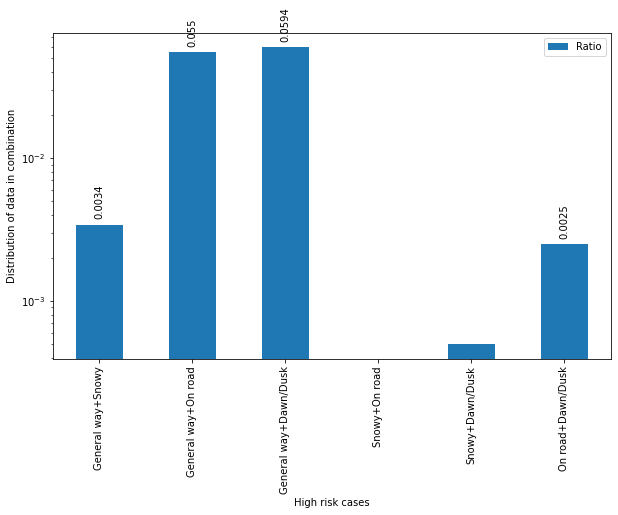

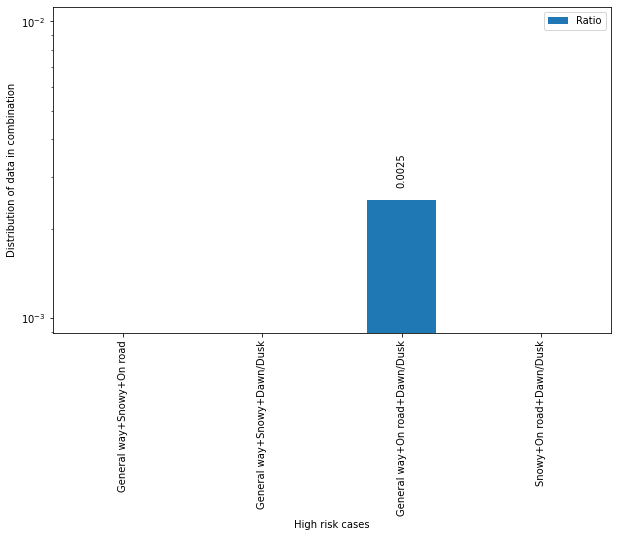

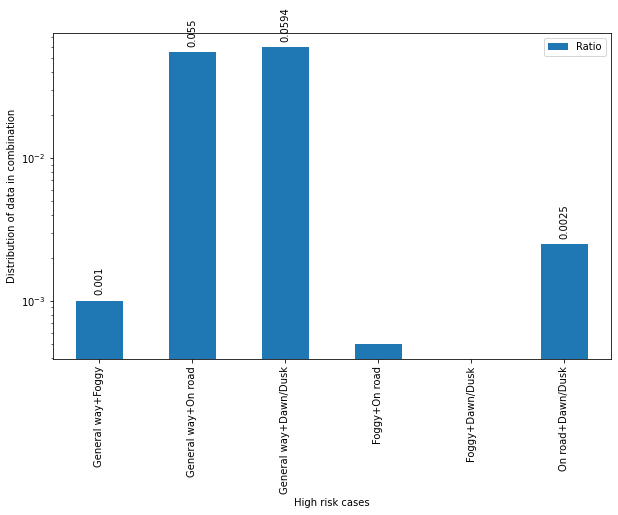

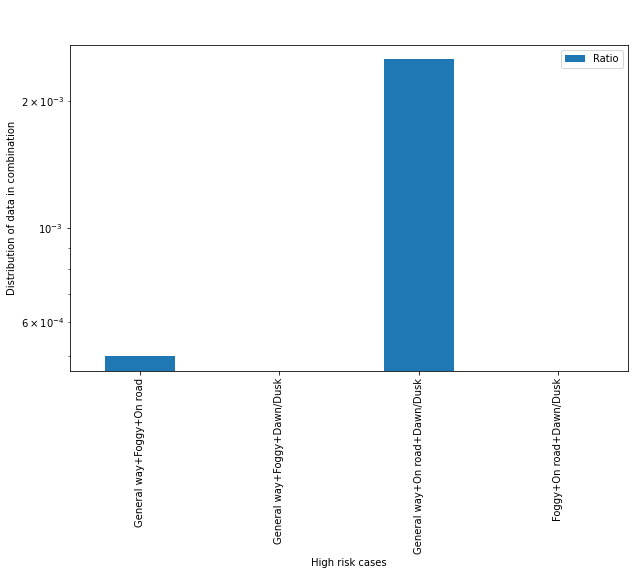

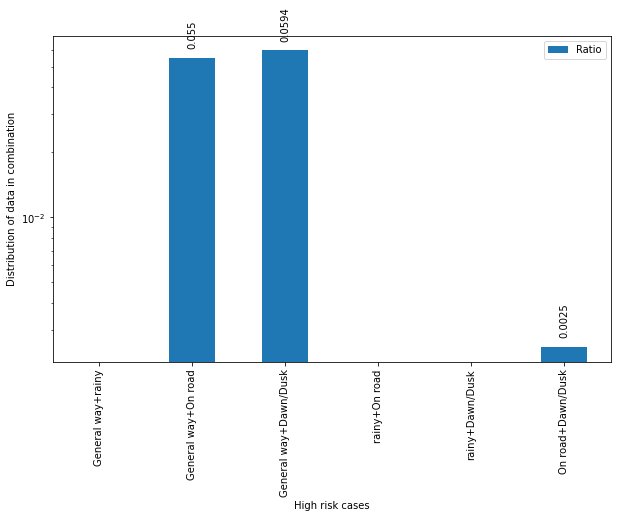

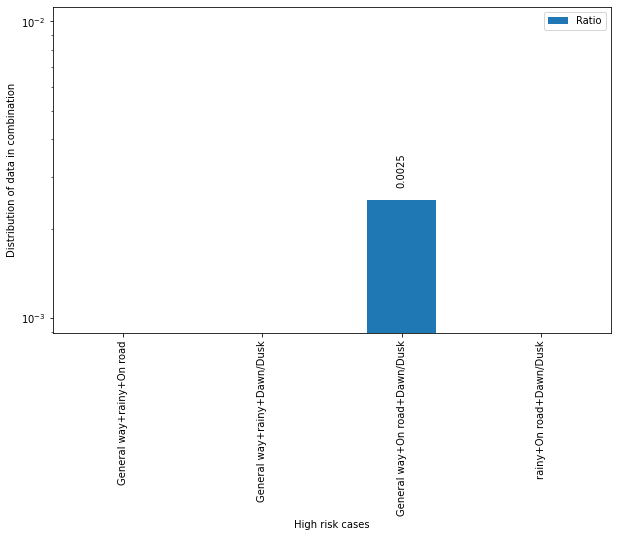

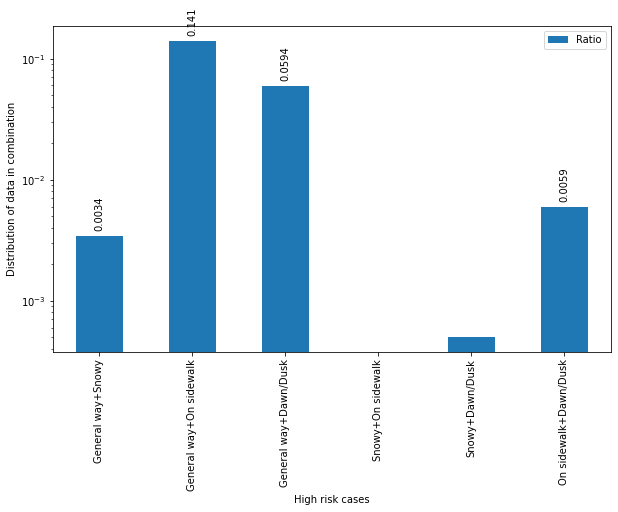

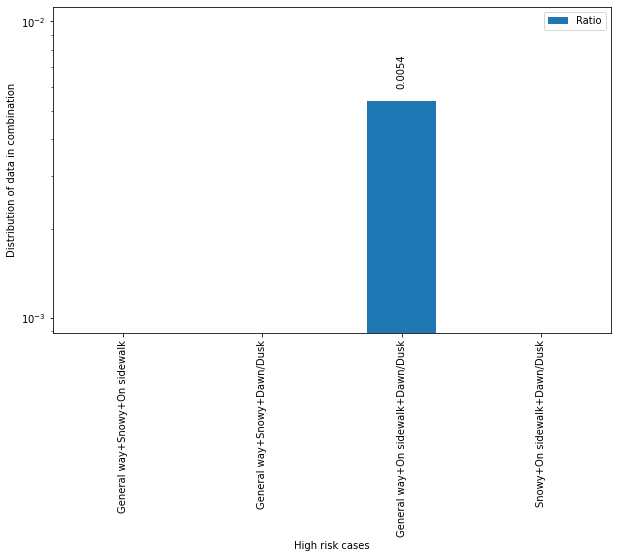

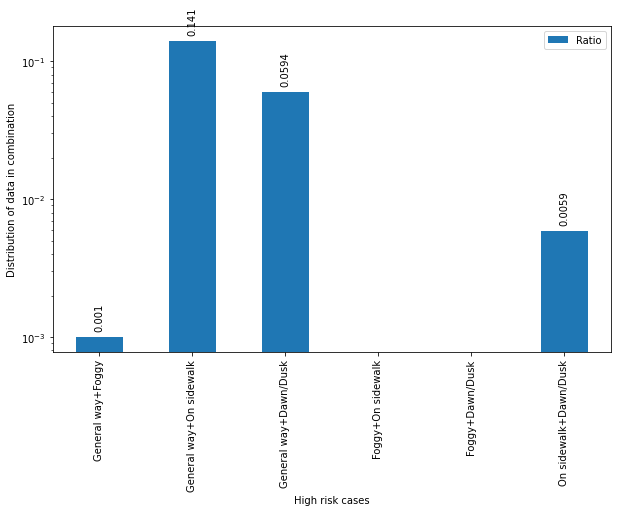

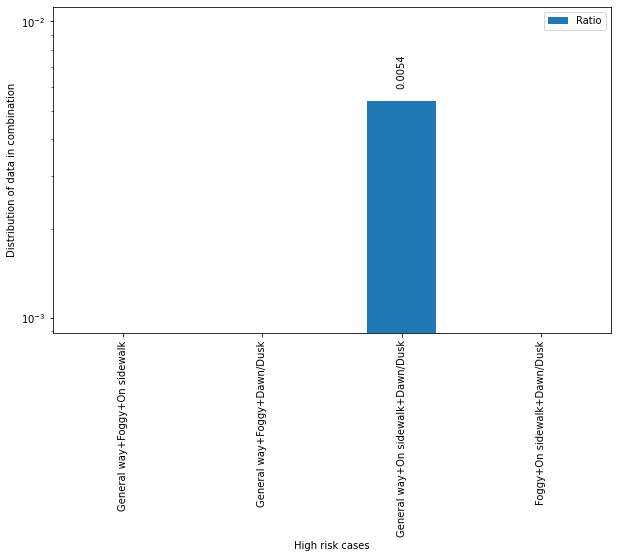

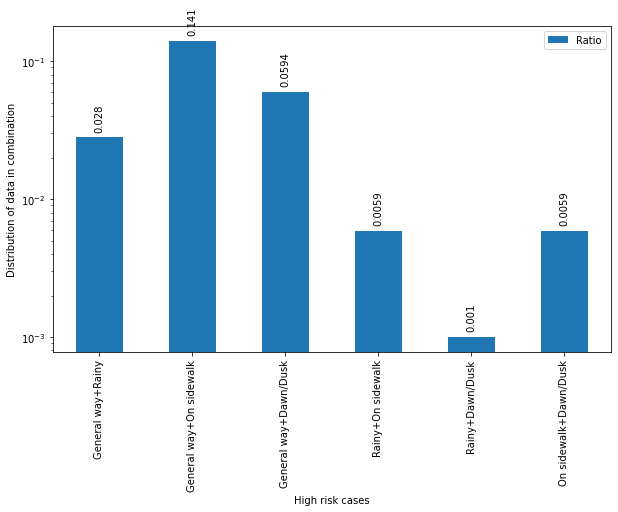

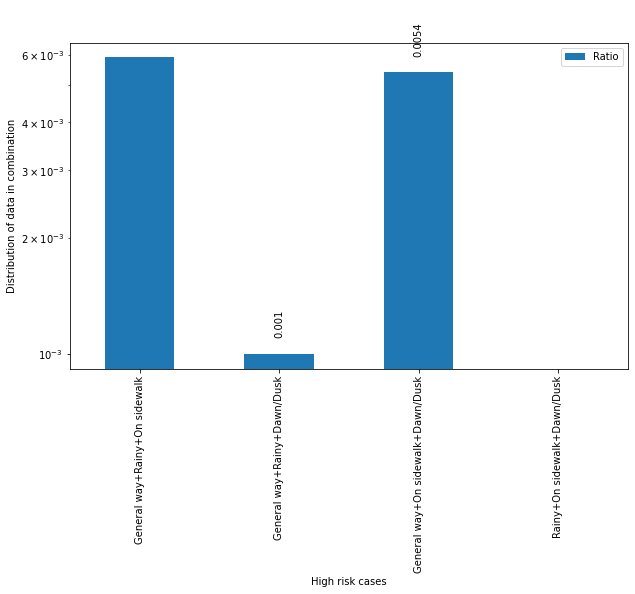

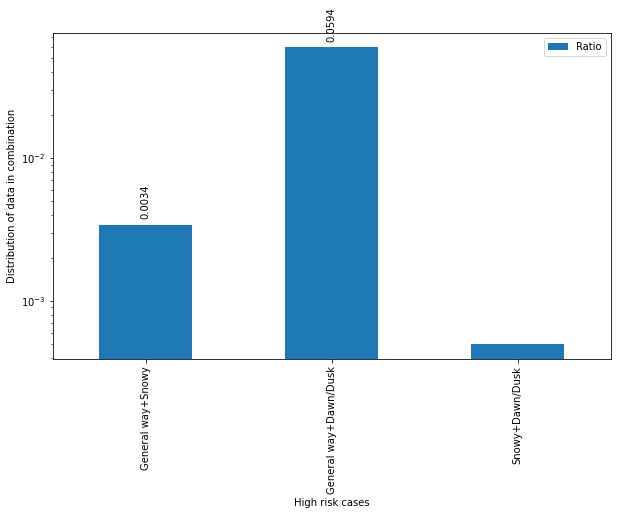

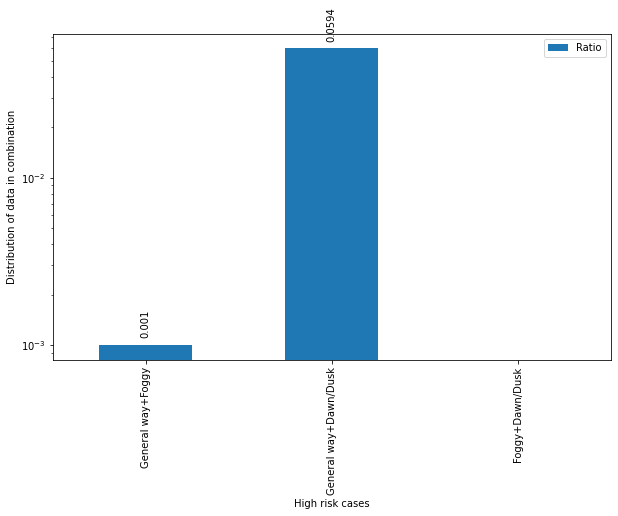

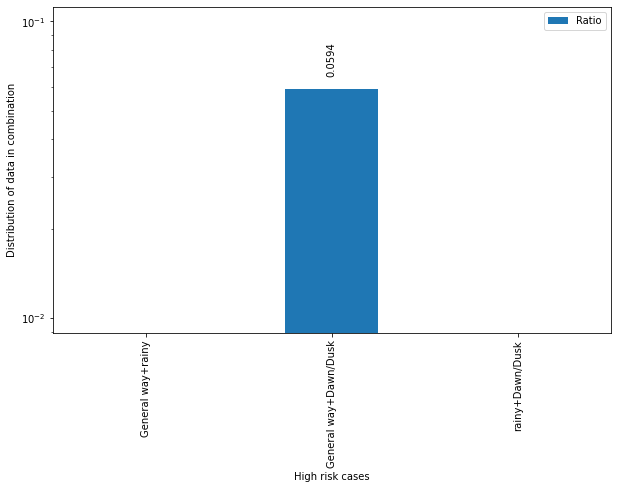

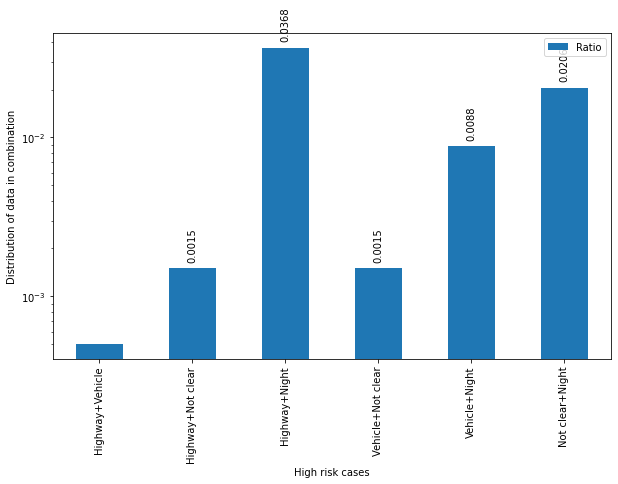

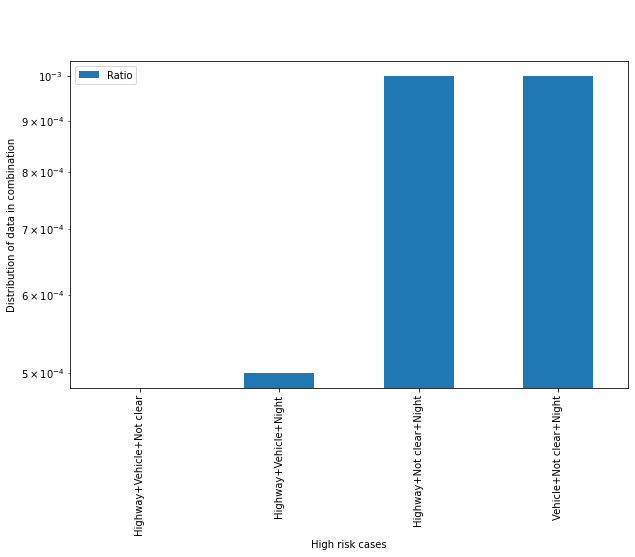

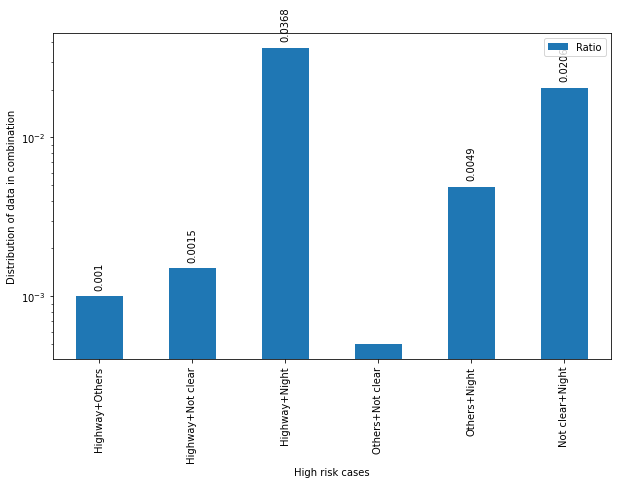

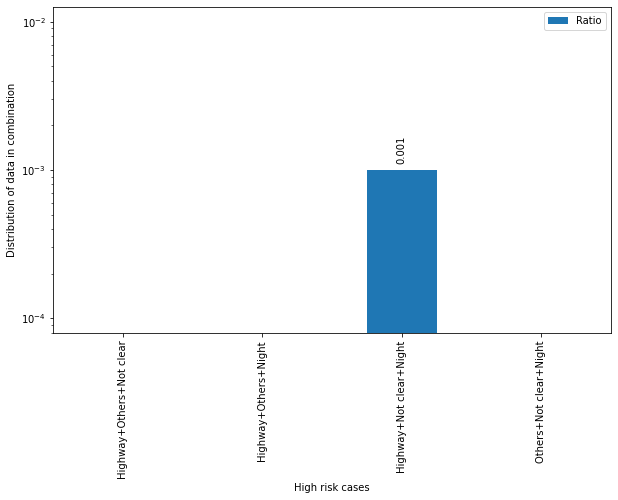

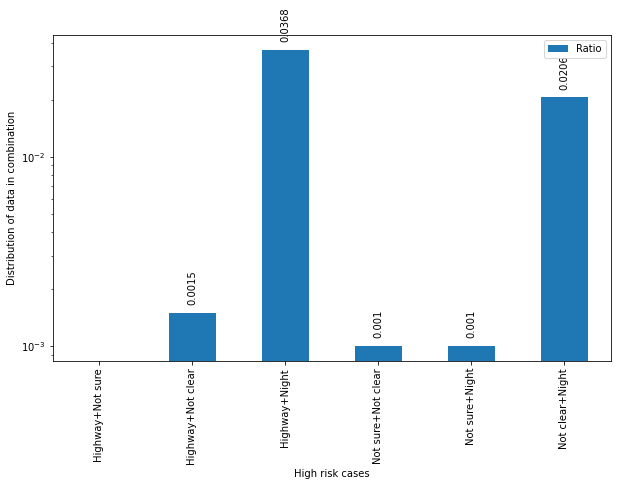

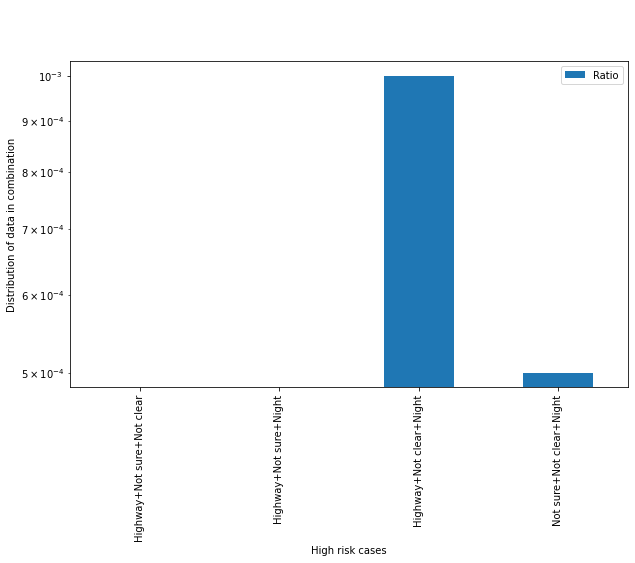

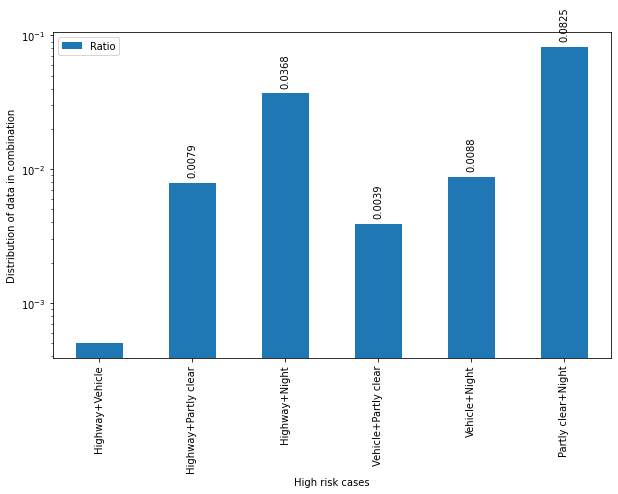

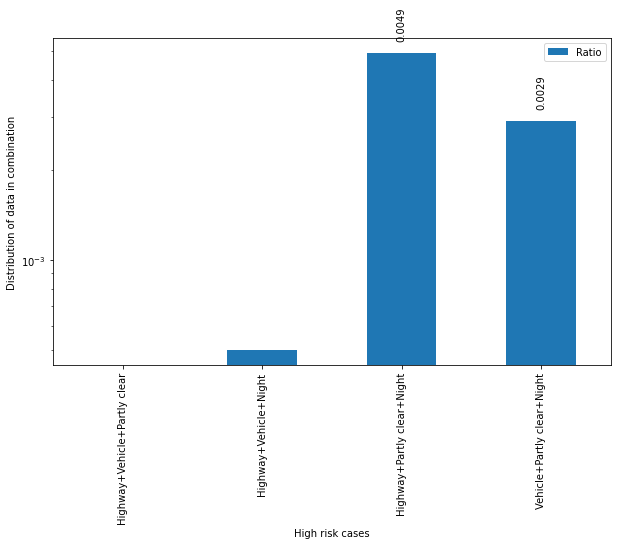

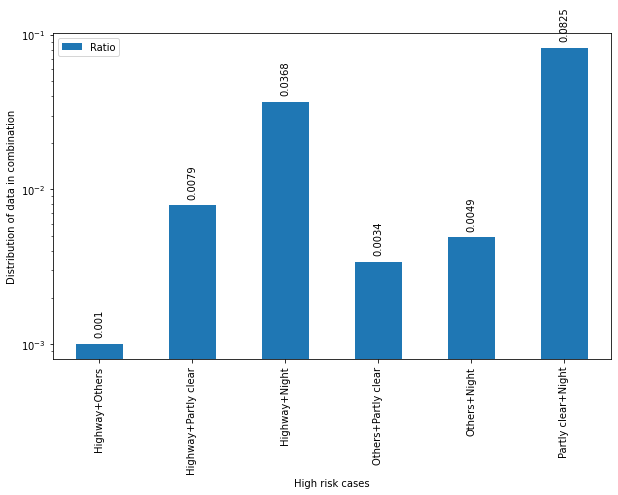

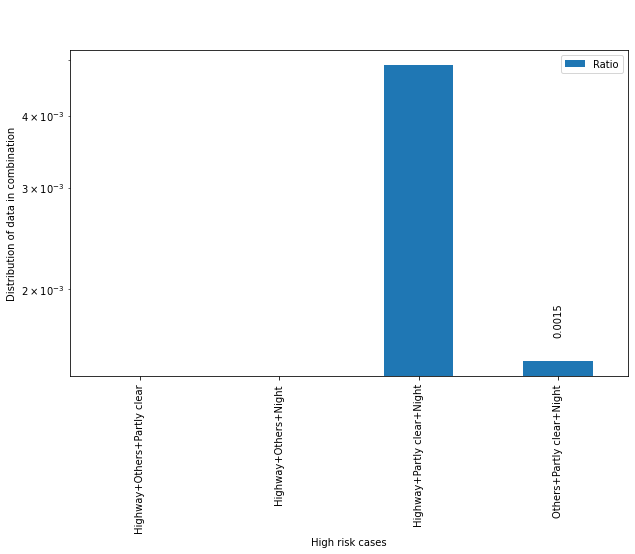

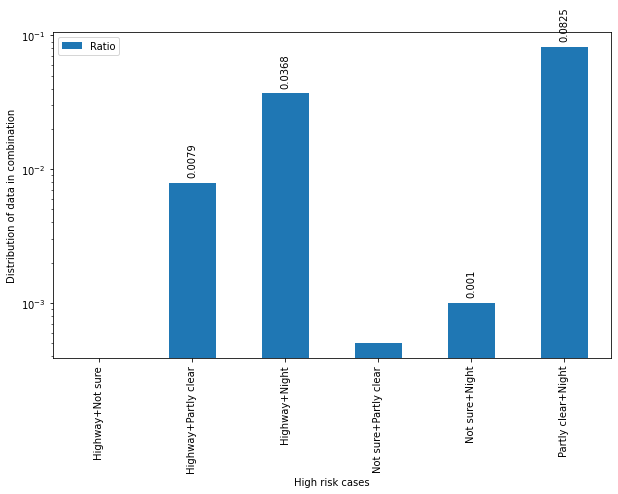

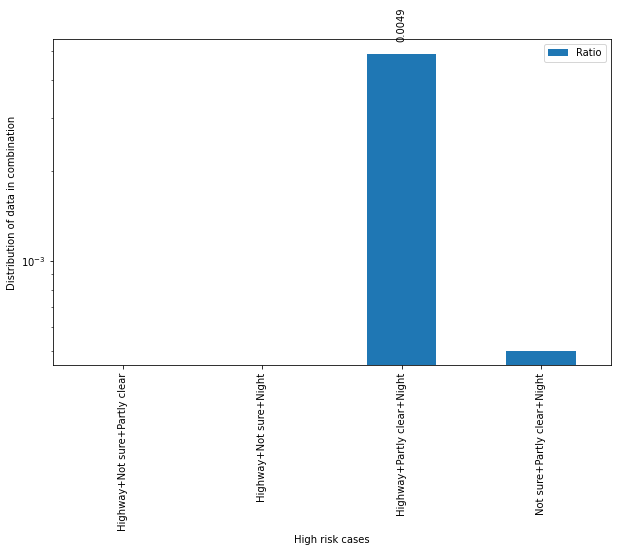

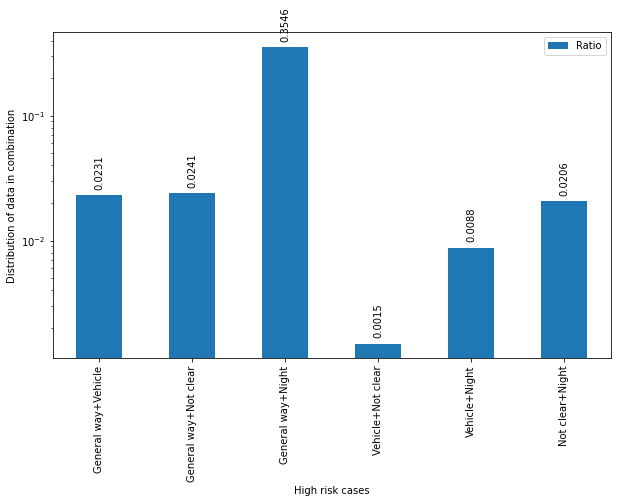

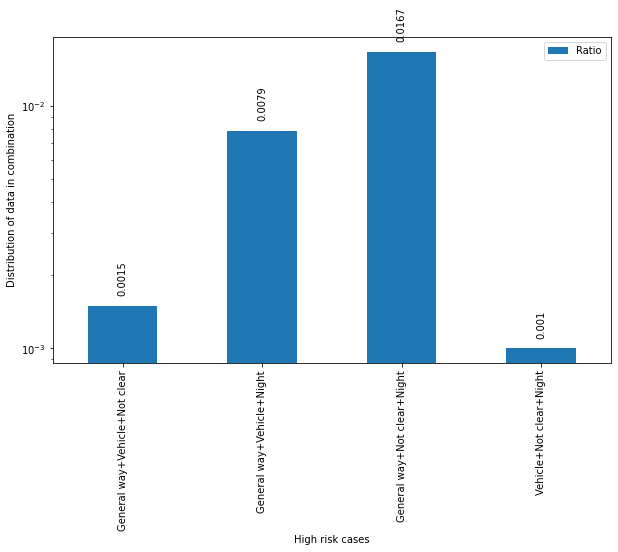

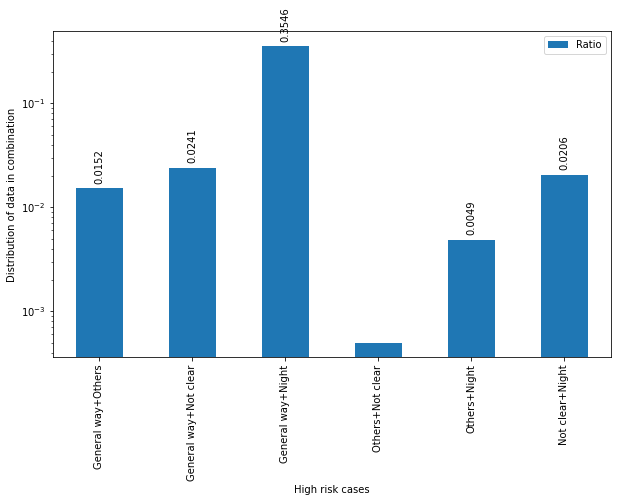

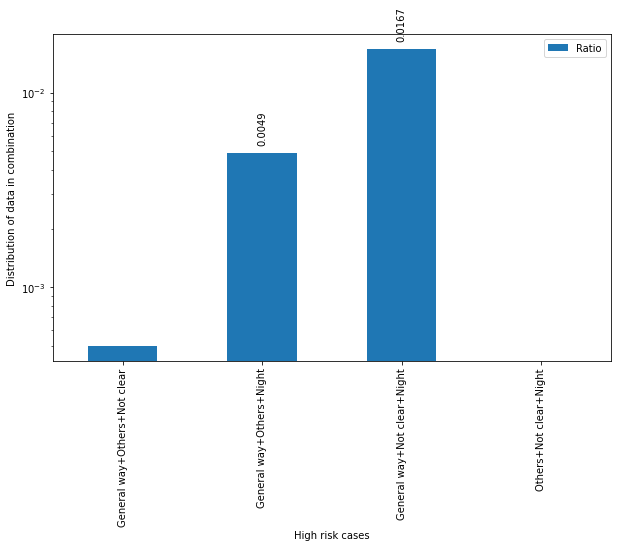

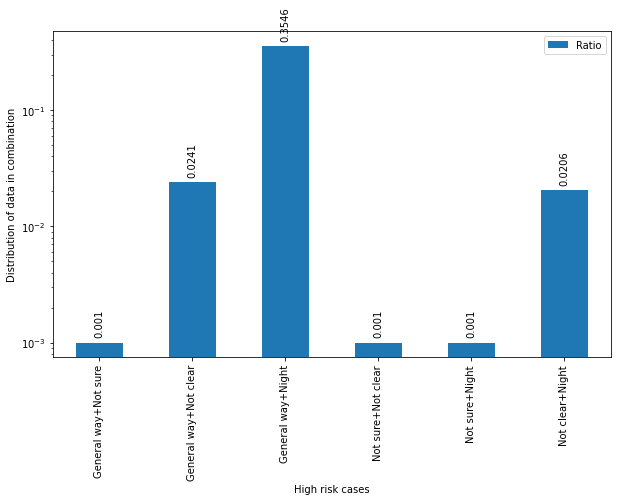

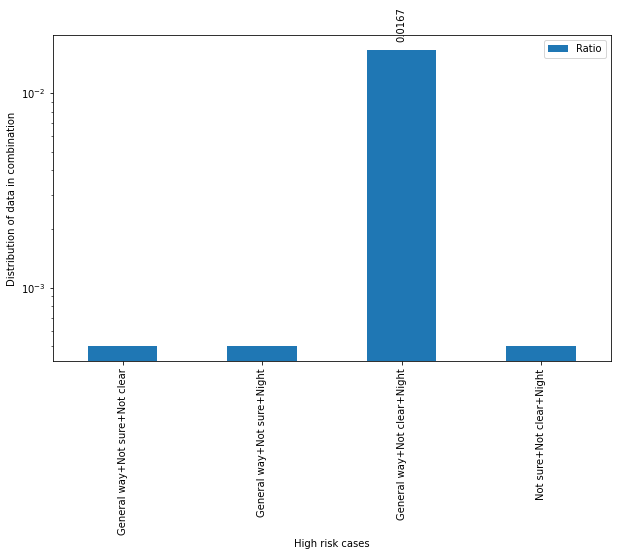

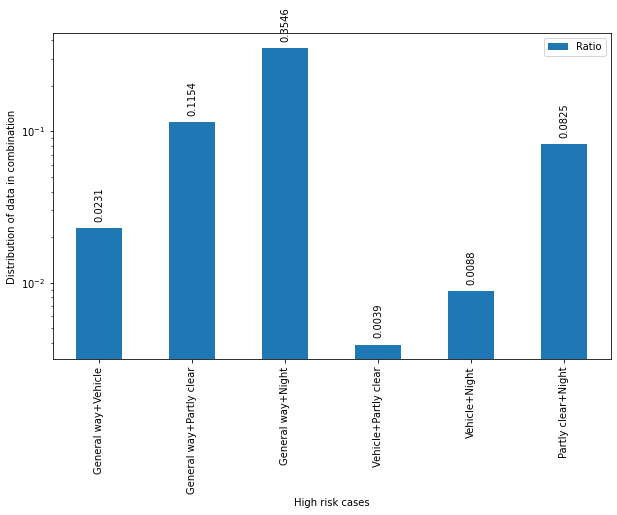

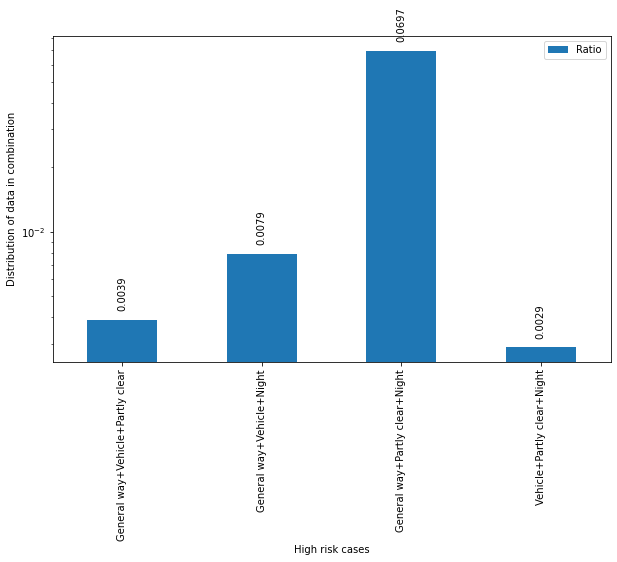

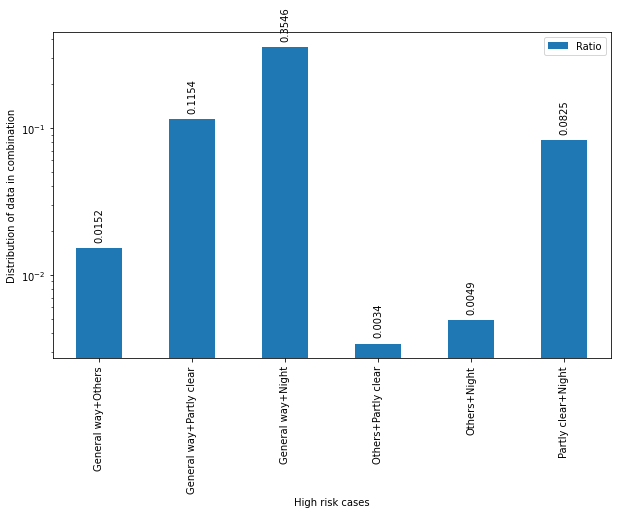

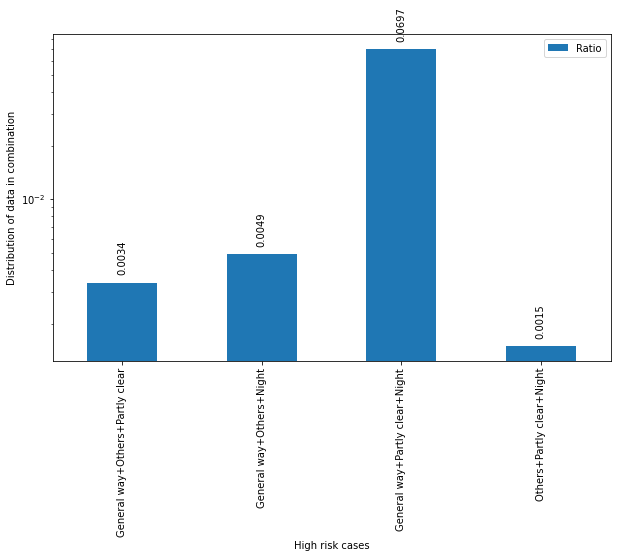

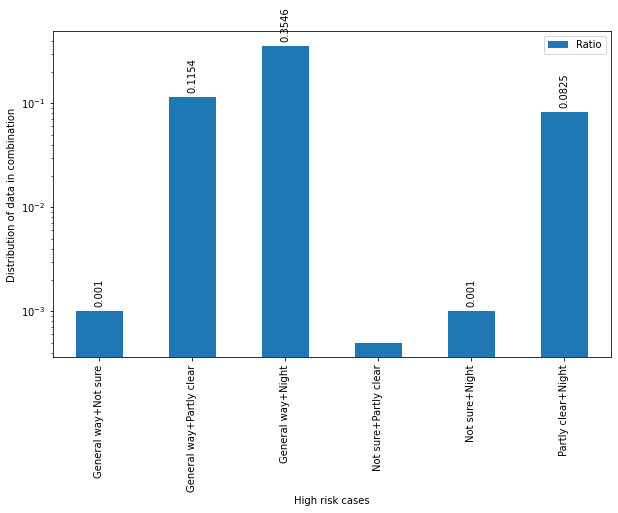

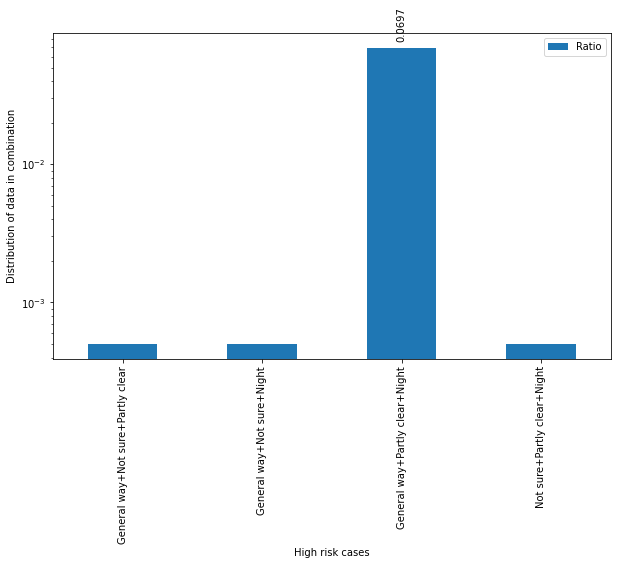

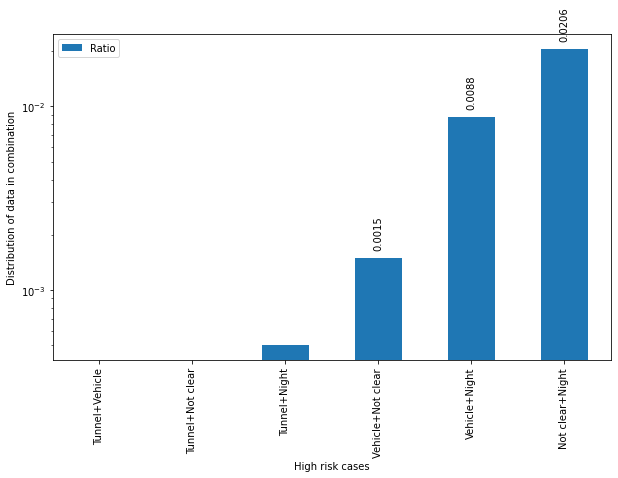

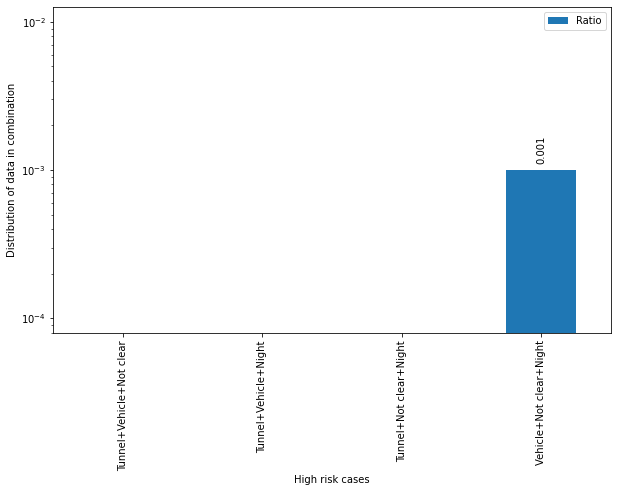

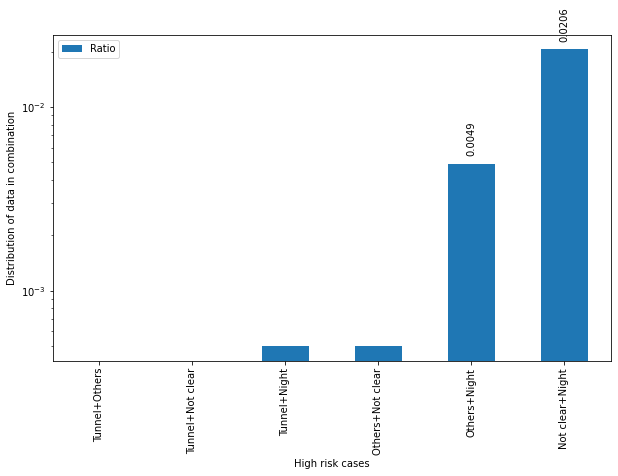

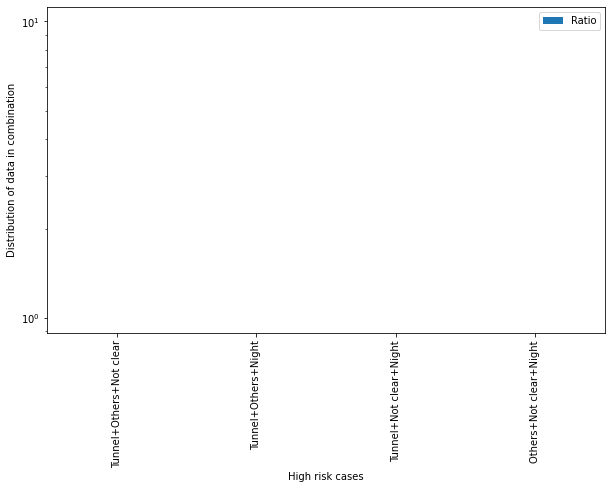

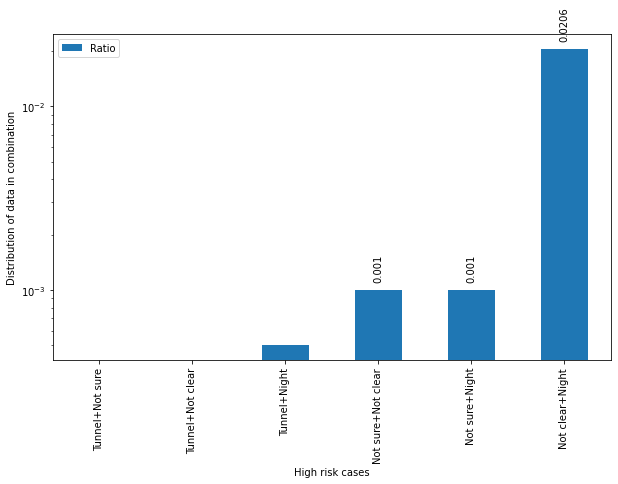

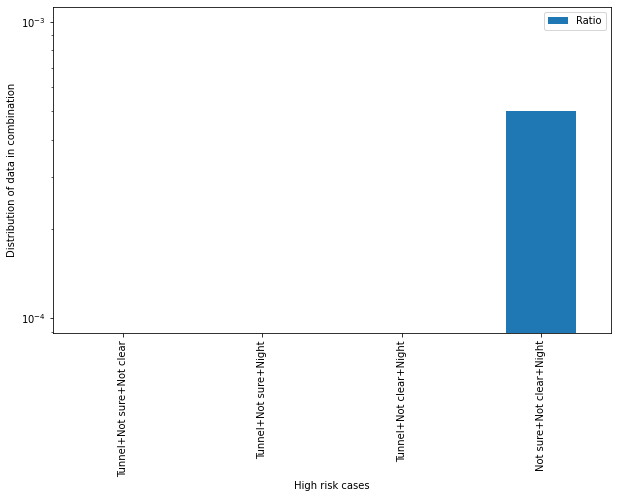

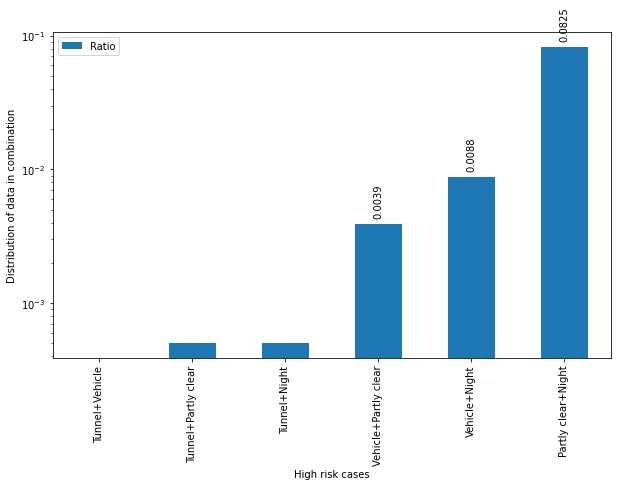

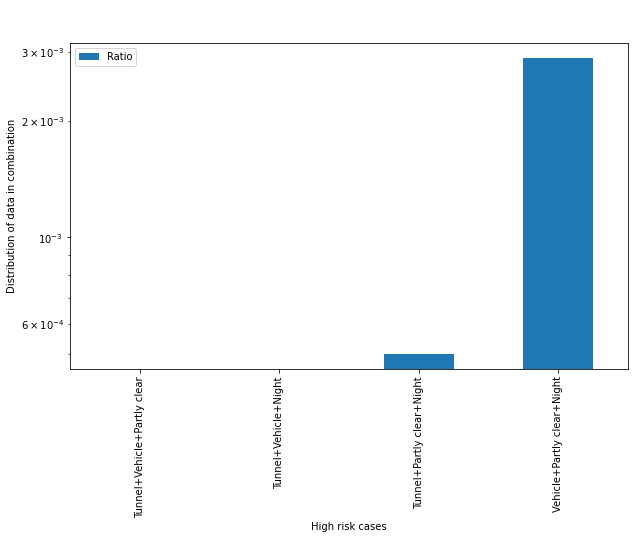

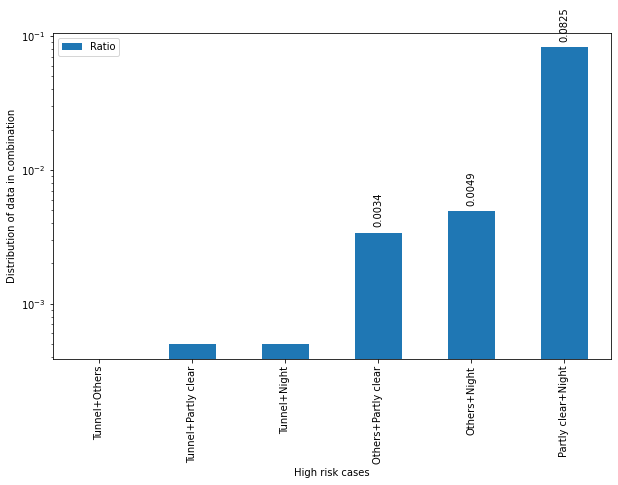

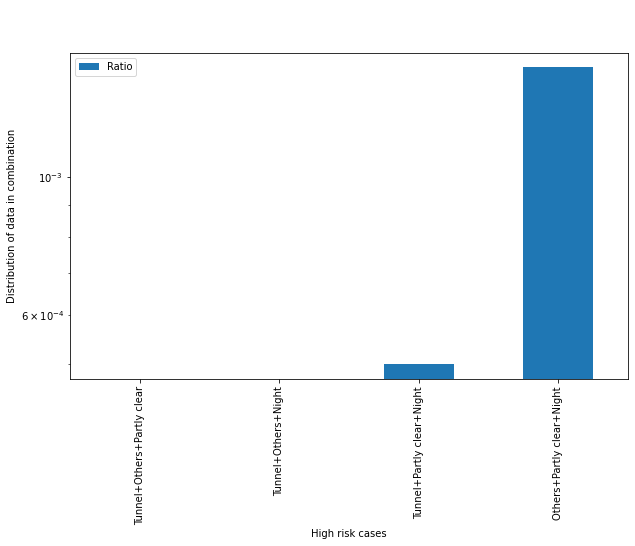

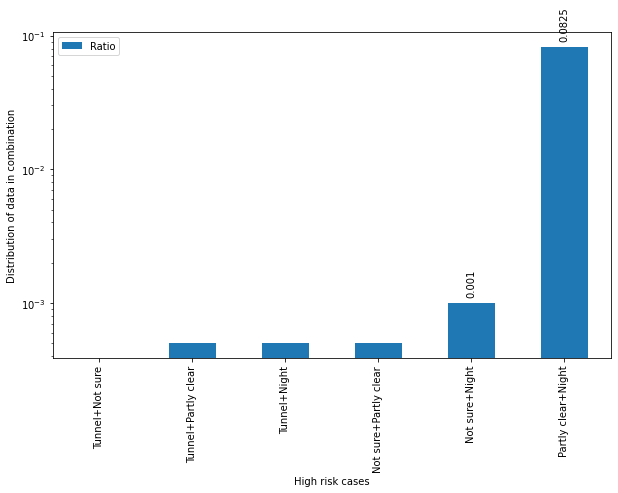

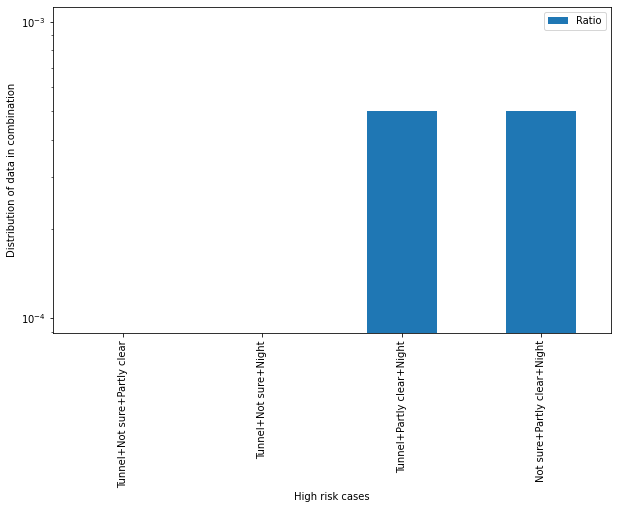

In [14]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [15]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [16]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
